# Business Problem

# Problem Description

Airbnb, Inc. is an American vacation rental online marketplace company based in San Francisco, California, United States. Airbnb offers arrangement for lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking.

New users on Airbnb can book a place to stay in 34,000+ cities across 190+ countries. By accurately predicting where a new user will book their first travel experience, Airbnb can share more personalized content with their community, decrease the average time to first booking, and better forecast demand.

# Problem statement :

We need to predict in which country a new user will make his or her first booking.


# Data Description:


# train_users.csv - the training set of users

# test_users.csv - the test set of users

id: user id
date_account_created: the date of account creation
timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up
date_first_booking: date of first booking
gender
age
signup_method
signup_flow: the page a user came to signup up from
language: international language preference
affiliate_channel: what kind of paid marketing
affiliate_provider: where the marketing is e.g. google, craigslist, other
first_affiliate_tracked: whats the first marketing the user interacted with before the signing up
signup_app
first_device_type
first_browser
country_destination: this is the target variable you are to predict

# sessions.csv - web sessions log for users

user_id: to be joined with the column 'id' in users table
action
action_type
action_detail
device_type
secs_elapsed

# countries.csv - summary statistics of destination countries in this dataset and their locations

# age_gender_bkts.csv - summary statistics of users' age group, gender, country of destination

# Objective:

Predict top 5 travel destinations in decreasing order of relevance

# Performance metrics:

The Performance metric used for this Project is NDCG (Normalized discounted cumulative gain)

# Sources:

https://en.wikipedia.org/wiki/Airbnb
https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/overview

# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import re
from wordcloud import WordCloud
from tqdm import tqdm
from datetime import datetime, date

In [ ]:
with zipfile.ZipFile('/home/puneetchandna12/airbnb-recruiting-new-user-bookings.zip', 'r') as zip_ref:
    zip_ref.extractall('/home/puneetchandna12/cs1')

In [ ]:
os.listdir('/home/puneetchandna12/cs1')

['sample_submission_NDF.csv',
 'test_users.csv',
 'test_users.csv.zip',
 'countries.csv.zip',
 'train_users_2.csv.zip',
 'countries.csv',
 'sample_submission_NDF.csv.zip',
 'train_users_2.csv',
 'age_gender_bkts.csv.zip',
 'sessions.csv.zip',
 'sessions.csv',
 'age_gender_bkts.csv']

In [ ]:
for x in os.listdir('/home/puneetchandna12/cs1'):
    
    with zipfile.ZipFile('/home/puneetchandna12/cs1'+'/'+x, 'r') as zip_ref:
        
        zip_ref.extractall('/home/puneetchandna12/cs1')

In [ ]:
os.listdir('/home/puneetchandna12/cs1')

['sample_submission_NDF.csv',
 'test_users.csv',
 'test_users.csv.zip',
 'countries.csv.zip',
 'train_users_2.csv.zip',
 'countries.csv',
 'sample_submission_NDF.csv.zip',
 'train_users_2.csv',
 'age_gender_bkts.csv.zip',
 'sessions.csv.zip',
 'sessions.csv',
 'age_gender_bkts.csv']

In [ ]:
#train csv

train_df = pd.read_csv('/home/puneetchandna12/cs1/train_users_2.csv')

print(train_df.shape)

print(train_df.columns)

train_df.head()

(213451, 16)
Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')


id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28          20090319043255                NaN   
1  820tgsjxq7           2011-05-25          20090523174809                NaN   
2  4ft3gnwmtx           2010-09-28          20090609231247         2010-08-02   
3  bjjt8pjhuk           2011-12-05          20091031060129         2012-09-08   
4  87mebub9p4           2010-09-14          20091208061105         2010-02-18   

      gender   age signup_method  signup_flow language affiliate_channel  \
0  -unknown-   NaN      facebook            0       en            direct   
1       MALE  38.0      facebook            0       en               seo   
2     FEMALE  56.0         basic            3       en            direct   
3     FEMALE  42.0      facebook            0       en            direct   
4  -unknown-  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked        Web       Mac Desktop   
1             google               untracked        Web       Mac Desktop   
2             direct               untracked        Web   Windows Desktop   
3             direct               untracked        Web       Mac Desktop   
4             direct               untracked        Web       Mac Desktop   

  first_browser country_destination  
0        Chrome                 NDF  
1        Chrome                 NDF  
2            IE                  US  
3       Firefox               other  
4        Chrome                  US

In [ ]:
#Checking null values
train_df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [ ]:
# sessions csv

session_df = pd.read_csv("/home/puneetchandna12/cs1/sessions.csv")

print(session_df.shape)

print("\nColumns:",session_df.columns)

session_df.head()

(10567737, 6)

Columns: Index(['user_id', 'action', 'action_type', 'action_detail', 'device_type',
       'secs_elapsed'],
      dtype='object')


user_id          action action_type        action_detail  \
0  d1mm9tcy42          lookup         NaN                  NaN   
1  d1mm9tcy42  search_results       click  view_search_results   
2  d1mm9tcy42          lookup         NaN                  NaN   
3  d1mm9tcy42  search_results       click  view_search_results   
4  d1mm9tcy42          lookup         NaN                  NaN   

       device_type  secs_elapsed  
0  Windows Desktop         319.0  
1  Windows Desktop       67753.0  
2  Windows Desktop         301.0  
3  Windows Desktop       22141.0  
4  Windows Desktop         435.0

In [ ]:
#Checking null values
session_df.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [ ]:
print(session_df.shape)

session_df = session_df.dropna(subset = ['user_id'])

print(session_df.shape)

(10567737, 6)
(10533241, 6)


In [ ]:
session_df['user_id'].nunique()

135483

In [ ]:
session_df['action'].value_counts()

show                           2758985
index                           841071
search_results                  723124
personalize                     704782
search                          533833
ajax_refresh_subtotal           486414
similar_listings                363423
update                          362708
social_connections              337764
reviews                         319318
active                          187370
similar_listings_v2             168457
lookup                          161422
create                          155233
dashboard                       152515
header_userpic                  141315
collections                     124067
edit                            108927
campaigns                       104647
track_page_view                  80949
unavailabilities                 77985
qt2                              64585
notifications                    59198
confirm_email                    58557
requested                        57020
identity                 

In [ ]:
session_df['action_type'].value_counts()

view                3549375
data                2096655
click               1990058
-unknown-           1028251
submit               620063
message_post          86925
partner_callback      19053
booking_request       18762
modify                 1138
booking_response          4
Name: action_type, dtype: int64

In [ ]:
session_df['action_detail'].value_counts()

view_search_results               1771026
p3                                1371626
-unknown-                         1028222
wishlist_content_update            704782
user_profile                       654626
change_trip_characteristics        486414
similar_listings                   363423
user_social_connections            335577
listing_reviews                    267991
update_listing                     267776
dashboard                          152515
user_wishlists                     152260
header_userpic                     141315
message_thread                     132199
edit_profile                       108531
message_post                        86925
contact_host                        80872
unavailable_dates                   77475
confirm_email_link                  58253
create_user                         54611
change_contact_host_dates           52426
user_profile_content_update         50353
user_reviews                        49424
p5                                

1) To condense multiple rows into 1

In [ ]:
#https://stackoverflow.com/questions/34776651/concatenate-rows-of-pandas-dataframe-with-same-id

session_df_concat = session_df.groupby('user_id', as_index=False).agg(lambda x: x.tolist())

print(session_df_concat.shape)

session_df_concat.head()

(135483, 6)


user_id                                             action  \
0  00023iyk9l  [index, dashboard, header_userpic, dashboard, ...   
1  0010k6l0om  [search_results, show, personalize, show, sear...   
2  001wyh0pz8  [search, search, search, show, social_connecti...   
3  0028jgx1x1  [show, reviews, show, search, show, search, re...   
4  002qnbzfs5  [social_connections, payment_methods, create, ...   

                                         action_type  \
0  [view, view, data, view, partner_callback, mes...   
1  [click, view, data, nan, click, click, nan, da...   
2  [click, click, click, view, data, -unknown-, v...   
3  [view, data, view, click, view, click, data, s...   
4  [data, -unknown-, -unknown-, view, data, data,...   

                                       action_detail  \
0  [view_search_results, dashboard, header_userpi...   
1  [view_search_results, p3, wishlist_content_upd...   
2  [view_search_results, view_search_results, vie...   
3  [user_profile, listing_reviews, p3, view_searc...   
4  [user_social_connections, -unknown-, -unknown-...   

                                         device_type  \
0  [Mac Desktop, Mac Desktop, Mac Desktop, Mac De...   
1  [Mac Desktop, Mac Desktop, Mac Desktop, Mac De...   
2  [Android App Unknown Phone/Tablet, Android App...   
3  [-unknown-, -unknown-, -unknown-, -unknown-, -...   
4  [iPhone, iPhone, iPhone, iPhone, iPhone, iPhon...   

                                        secs_elapsed  
0  [20438.0, 787.0, 850.0, 934.0, nan, 129817.0, ...  
1  [1708.0, 21260.0, 1223.0, 26.0, 847.0, 1230.0,...  
2  [622.0, 1813.0, 1507.0, 6327.0, 927.0, 142.0, ...  
3  [6162.0, 75.0, 86.0, 13710.0, 25217.0, 10989.0...  
4  [17135.0, 711.0, 274.0, 179.0, 483.0, 1.0, 782...

In [ ]:
#test csv

test_df = pd.read_csv('/home/puneetchandna12/cs1/test_users.csv')

print(test_df.shape)

print(test_df.columns)

test_df.head()

(62096, 15)
Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')


id date_account_created  timestamp_first_active  \
0  5uwns89zht           2014-07-01          20140701000006   
1  jtl0dijy2j           2014-07-01          20140701000051   
2  xx0ulgorjt           2014-07-01          20140701000148   
3  6c6puo6ix0           2014-07-01          20140701000215   
4  czqhjk3yfe           2014-07-01          20140701000305   

   date_first_booking     gender   age signup_method  signup_flow language  \
0                 NaN     FEMALE  35.0      facebook            0       en   
1                 NaN  -unknown-   NaN         basic            0       en   
2                 NaN  -unknown-   NaN         basic            0       en   
3                 NaN  -unknown-   NaN         basic            0       en   
4                 NaN  -unknown-   NaN         basic            0       en   

  affiliate_channel affiliate_provider first_affiliate_tracked signup_app  \
0            direct             direct               untracked      Moweb   
1            direct             direct               untracked      Moweb   
2            direct             direct                  linked        Web   
3            direct             direct                  linked        Web   
4            direct             direct               untracked        Web   

  first_device_type  first_browser  
0            iPhone  Mobile Safari  
1            iPhone  Mobile Safari  
2   Windows Desktop         Chrome  
3   Windows Desktop             IE  
4       Mac Desktop         Safari

In [ ]:
#Checking null values
test_df.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

In [ ]:
# Join train and session df

train_merge = train_df.merge(session_df_concat, left_on='id', right_on='user_id', how='inner')

print("Train  :",train_df.shape)

print("Session:",session_df_concat.shape)

print("Merge  :",train_merge.shape)

print("No of users in Train Data with session info:",train_merge.shape[0])

print("{} / {} = {}".format(train_merge.shape[0],train_df.shape[0],np.round((train_merge.shape[0]/train_df.shape[0]),2)))

Train  : (213451, 16)
Session: (135483, 6)
Merge  : (73815, 22)
No of users in Train Data with session info: 73815
73815 / 213451 = 0.35


1) only 35 % of users in train data have session info 

In [ ]:
# Join test and session df

test_merge = test_df.merge(session_df_concat, left_on='id', right_on='user_id', how='inner')

print("Test  :",test_df.shape)

print("Session:",session_df_concat.shape)

print("Merge  :",test_merge.shape)

print("No of users in Test Data with session info:",test_merge.shape[0])

print("{} / {} = {}".format(test_merge.shape[0],test_df.shape[0],np.round((test_merge.shape[0]/test_df.shape[0]),2)))

Test  : (62096, 15)
Session: (135483, 6)
Merge  : (61668, 21)
No of users in Test Data with session info: 61668
61668 / 62096 = 0.99


1) Nearly 1 % of users in test data dont have session info. 

2) Will use left join.

In [ ]:
# Join test and session df

test_merge = test_df.merge(session_df_concat, left_on='id', right_on='user_id', how='left')

print("Test  :",test_df.shape)

print("Session:",session_df_concat.shape)

print("Merge  :",test_merge.shape)

print("No of users in Test Data with session info:",test_merge.shape[0])

print("{} / {} = {}".format(test_merge.shape[0],test_df.shape[0],np.round((test_merge.shape[0]/test_df.shape[0]),2)))

Test  : (62096, 15)
Session: (135483, 6)
Merge  : (62096, 21)
No of users in Test Data with session info: 62096
62096 / 62096 = 1.0


# Univariate analysis

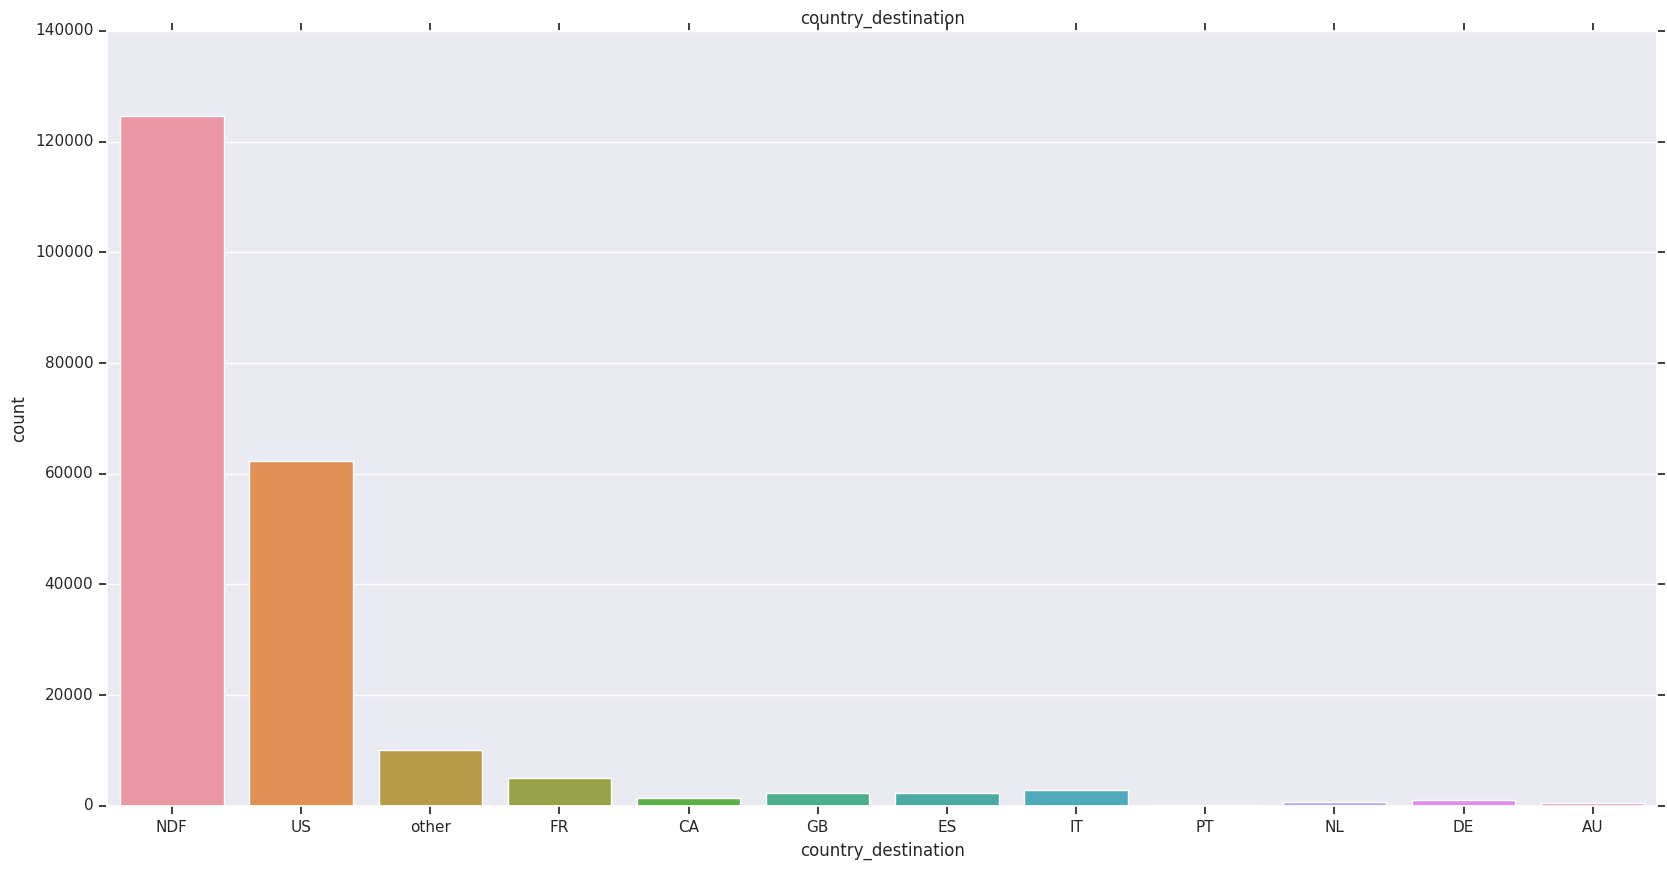

In [ ]:
# destination country share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="country_destination", data=train_df)

plt.title("country_destination")

plt.show()

1) The Dataset is highly Imbalanced.

2) Majority of users didnt do any booking or travelled to the US only.

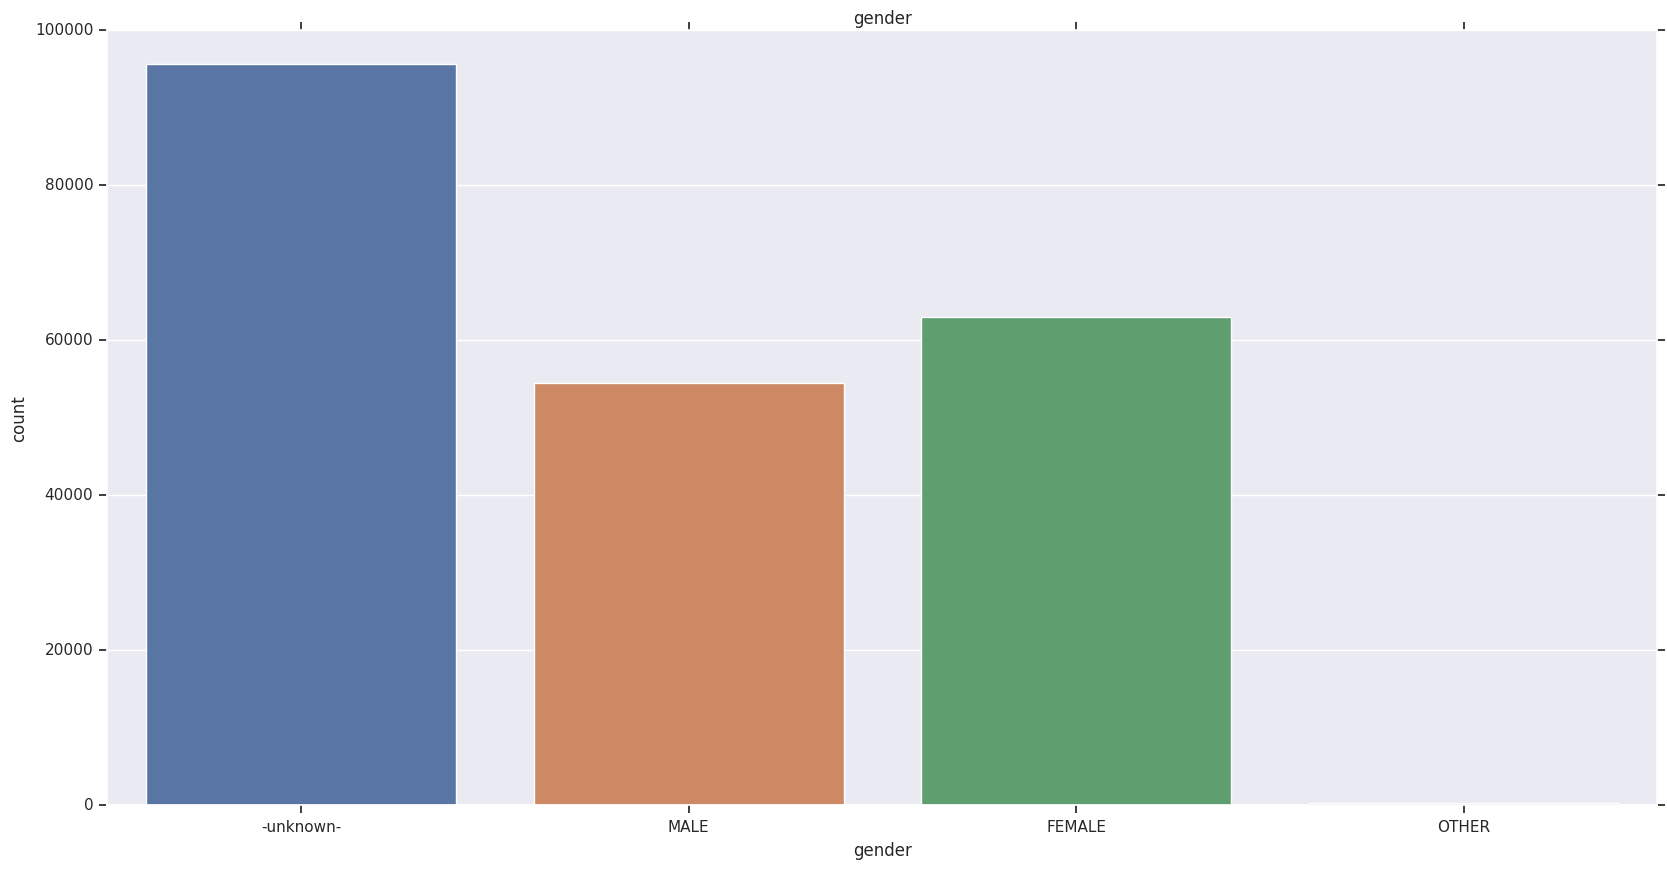

In [ ]:
# gender share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="gender", data=train_df)

plt.title("gender")

plt.show()

1) Male users are less than female users.

2) Almost half of the users's gender is unknown.

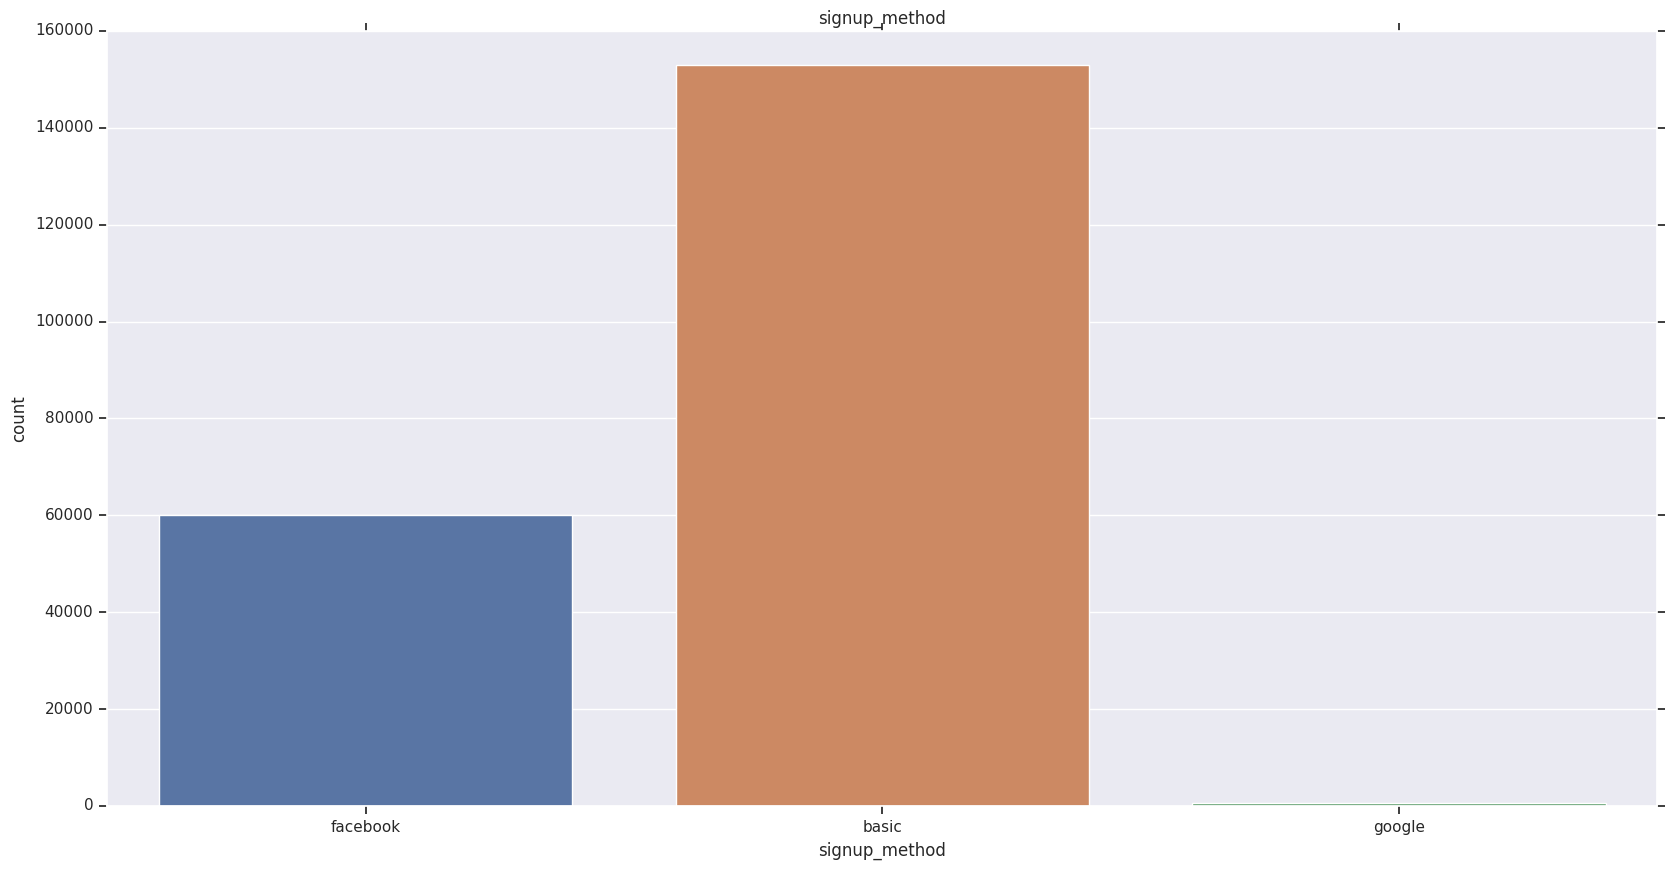

In [ ]:
# signup_method share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="signup_method", data=train_df)

plt.title("signup_method")

plt.show()

1) Majority of users either signup from basic or facebook.

2) Basic's share is more than double of facebook.

3) Googles's share is negligible.

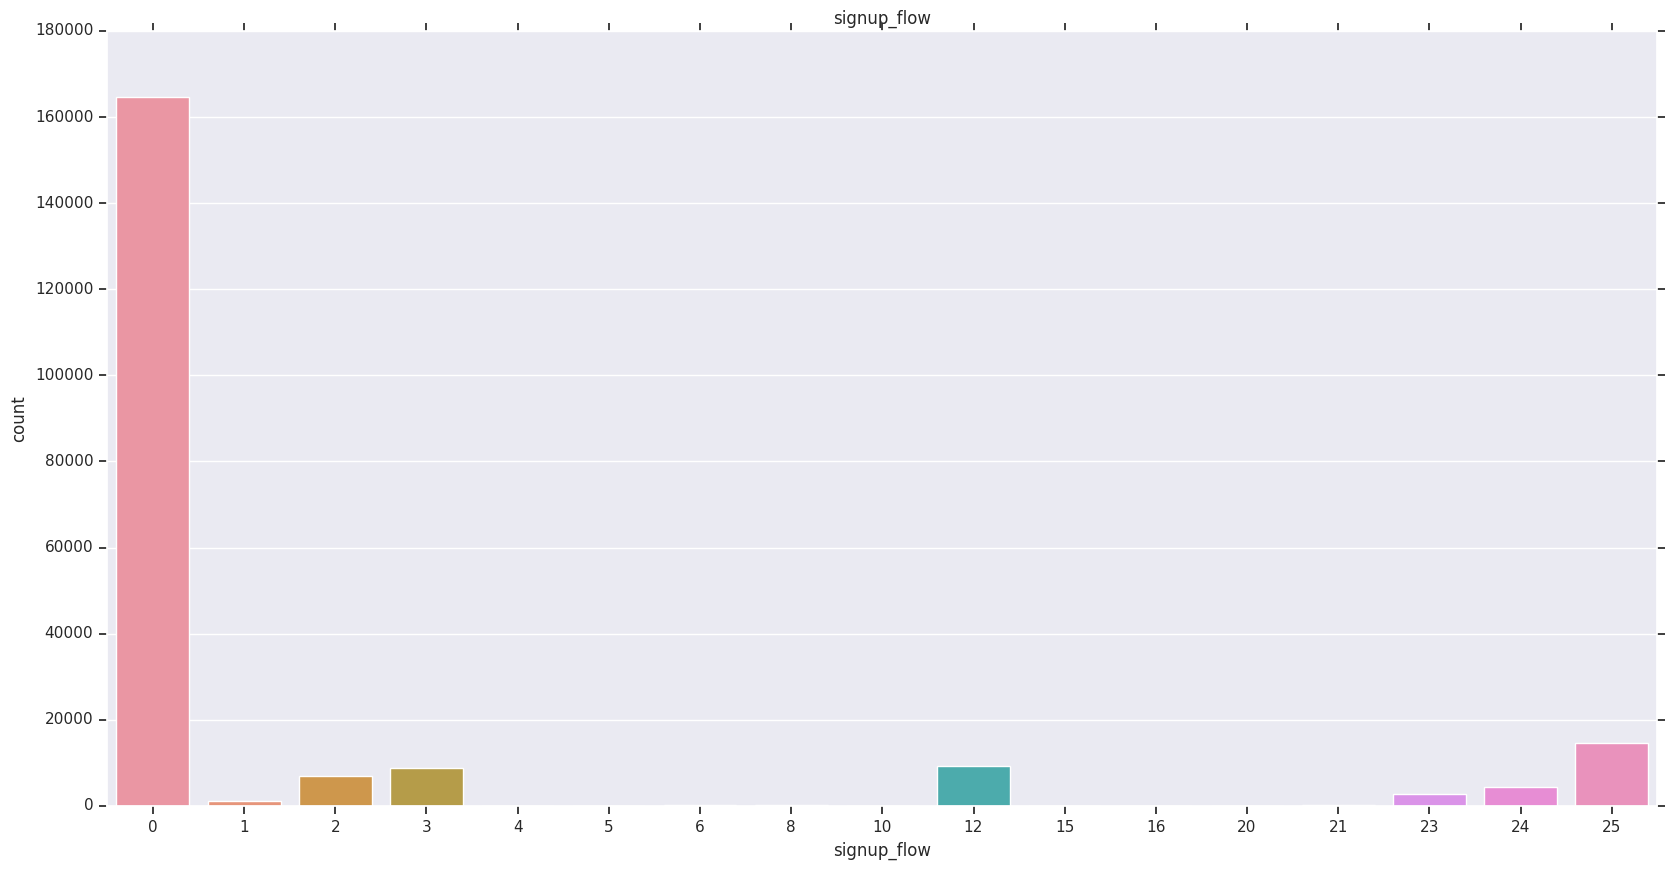

In [ ]:
# signup_flow share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="signup_flow", data=train_df)

plt.title("signup_flow")

plt.show()

1) Majority of users' signup flow is 0.

2) Other than 1,2,3,12,23,24 and 25, all others have negligible share.

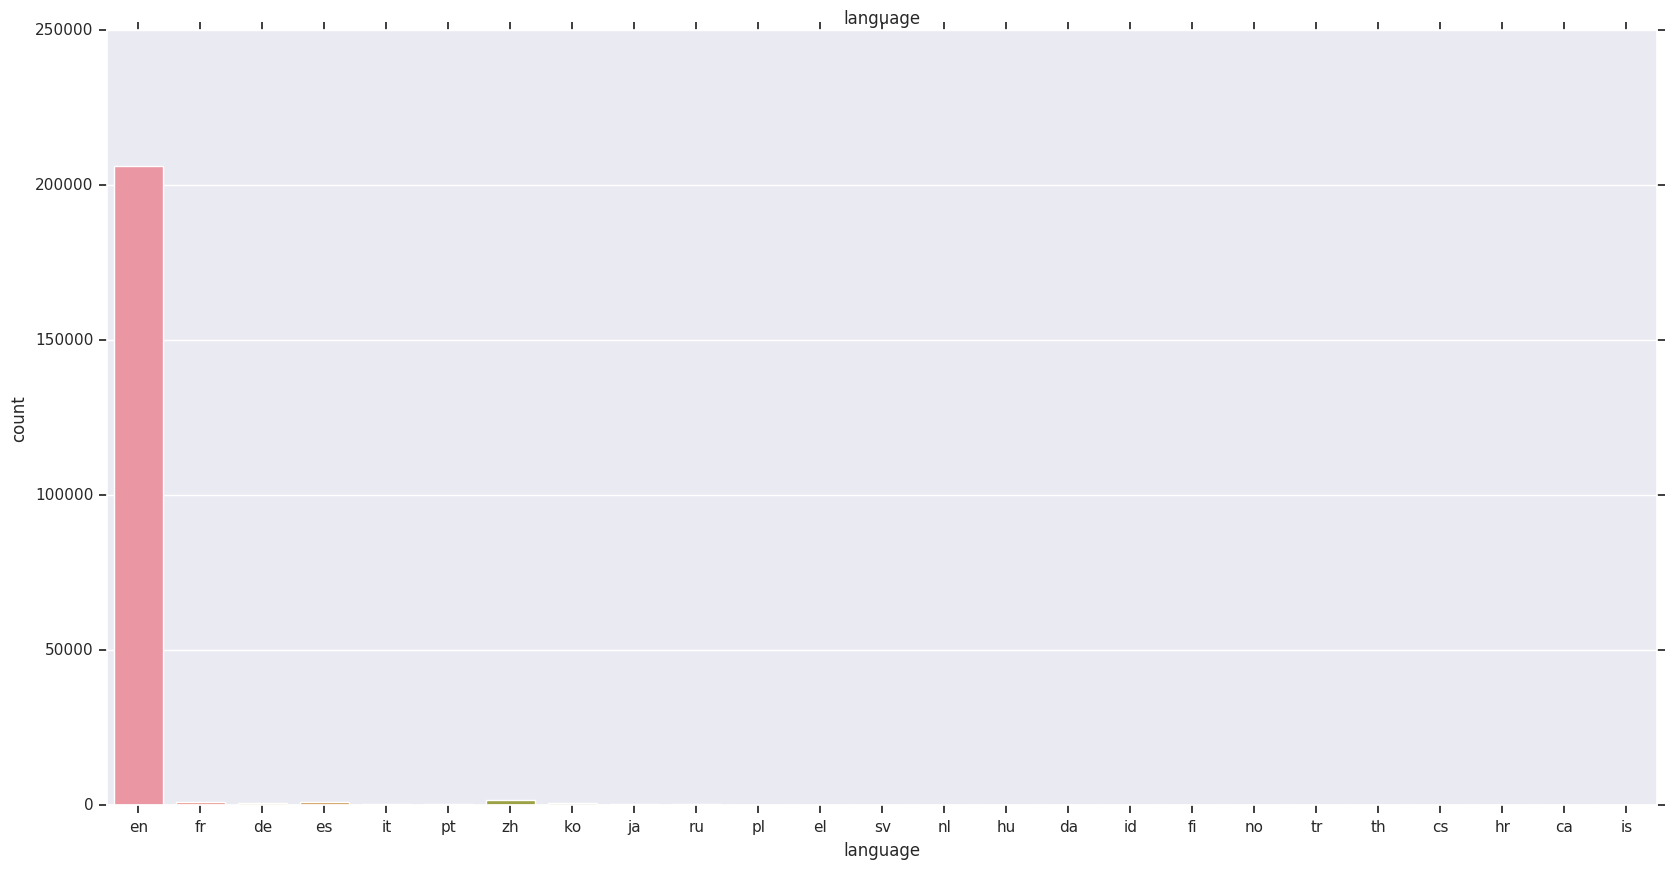

In [ ]:
# language share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="language", data=train_df)

plt.title("language")

plt.show()

1) Majority of users' language is english.

2) Other than 'zh' and 'fr', all others have negligible share.

In [ ]:
train_df['language'].value_counts()

en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
th        24
el        24
id        22
hu        18
fi        14
is         5
ca         5
hr         2
Name: language, dtype: int64

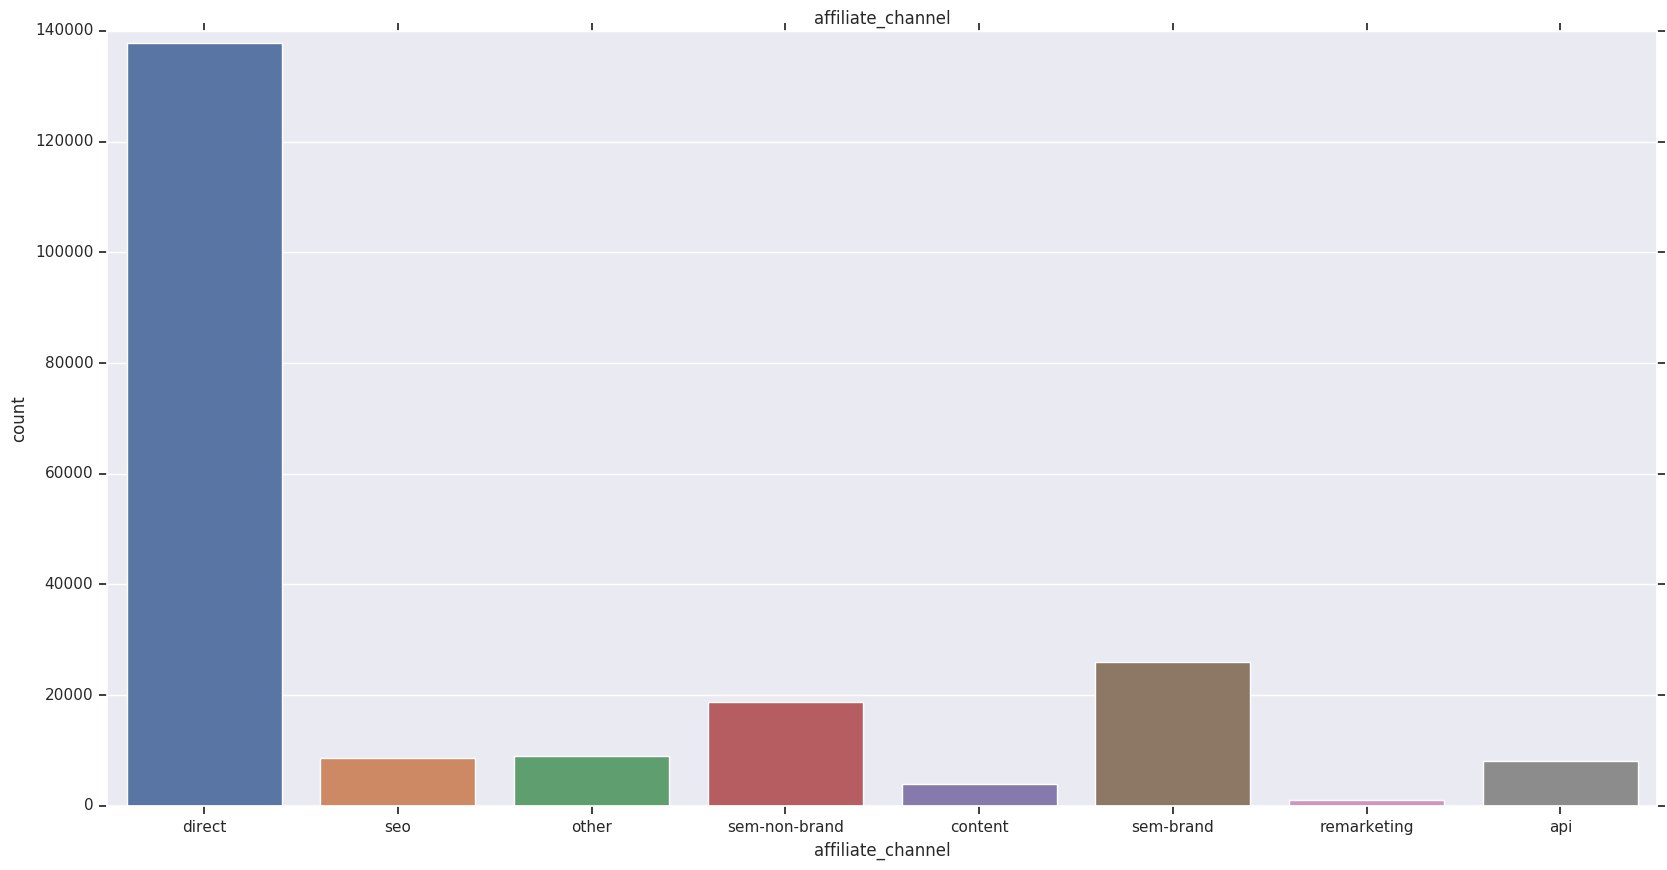

In [ ]:
# affiliate_channel share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="affiliate_channel", data=train_df)

plt.title("affiliate_channel")

plt.show()

1) Majority of users' affiliate channel is 'direct'.

2) 'remarketing' has the lowest share.

In [ ]:
train_df['affiliate_channel'].value_counts()

direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: affiliate_channel, dtype: int64

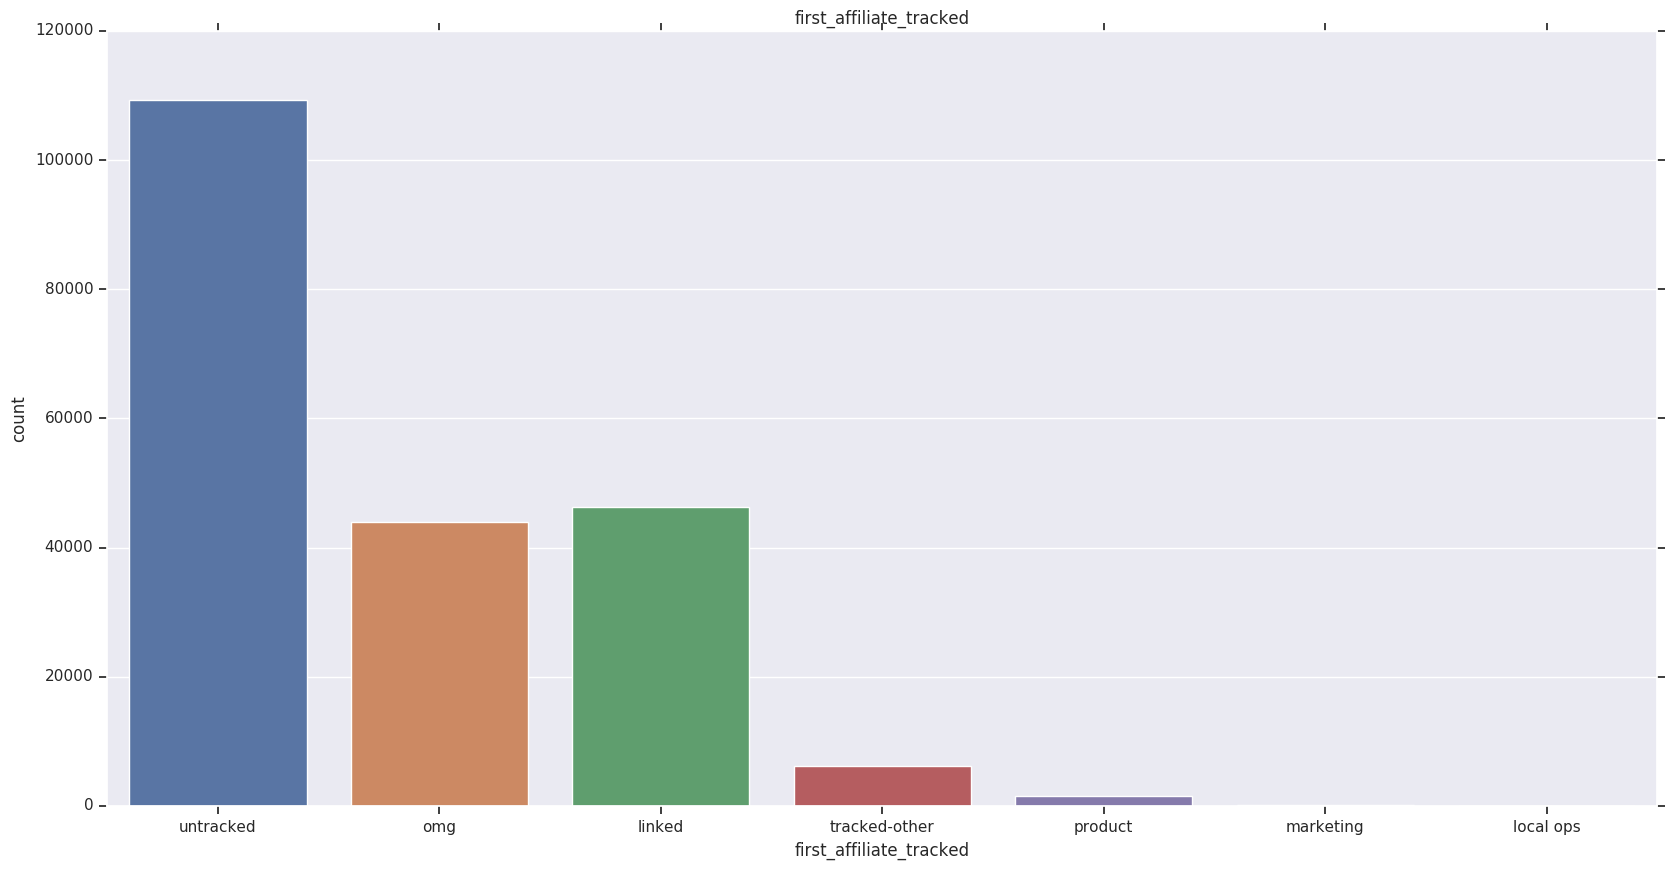

In [ ]:
# first_affiliate_tracked share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="first_affiliate_tracked", data=train_df)

plt.title("first_affiliate_tracked")

plt.show()

1) Majority of users' first affiliate tracked is 'untracked'.

2) 'marketing' and 'local ops' have the lowest share.

In [ ]:
train_df['first_affiliate_tracked'].value_counts()

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

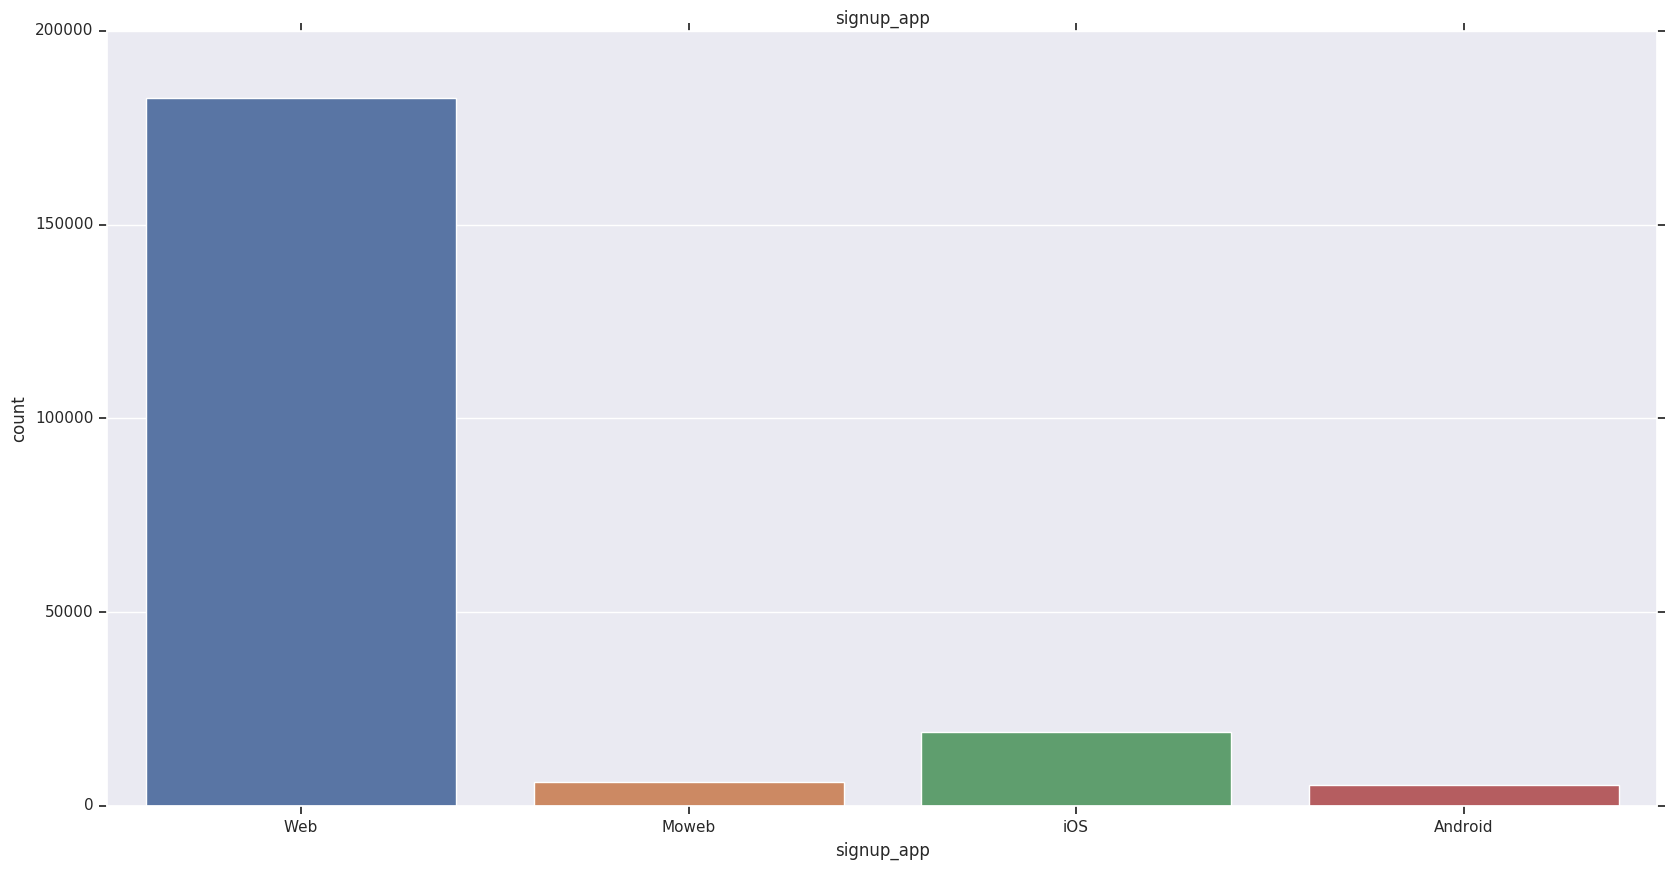

In [ ]:
# signup_app share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="signup_app", data=train_df)

plt.title("signup_app")

plt.show()

1) Majority of users' signup app is 'Web'.

2) 'iOS' is second most popular.

2) 'Moweb' and 'Android' have the lowest share.

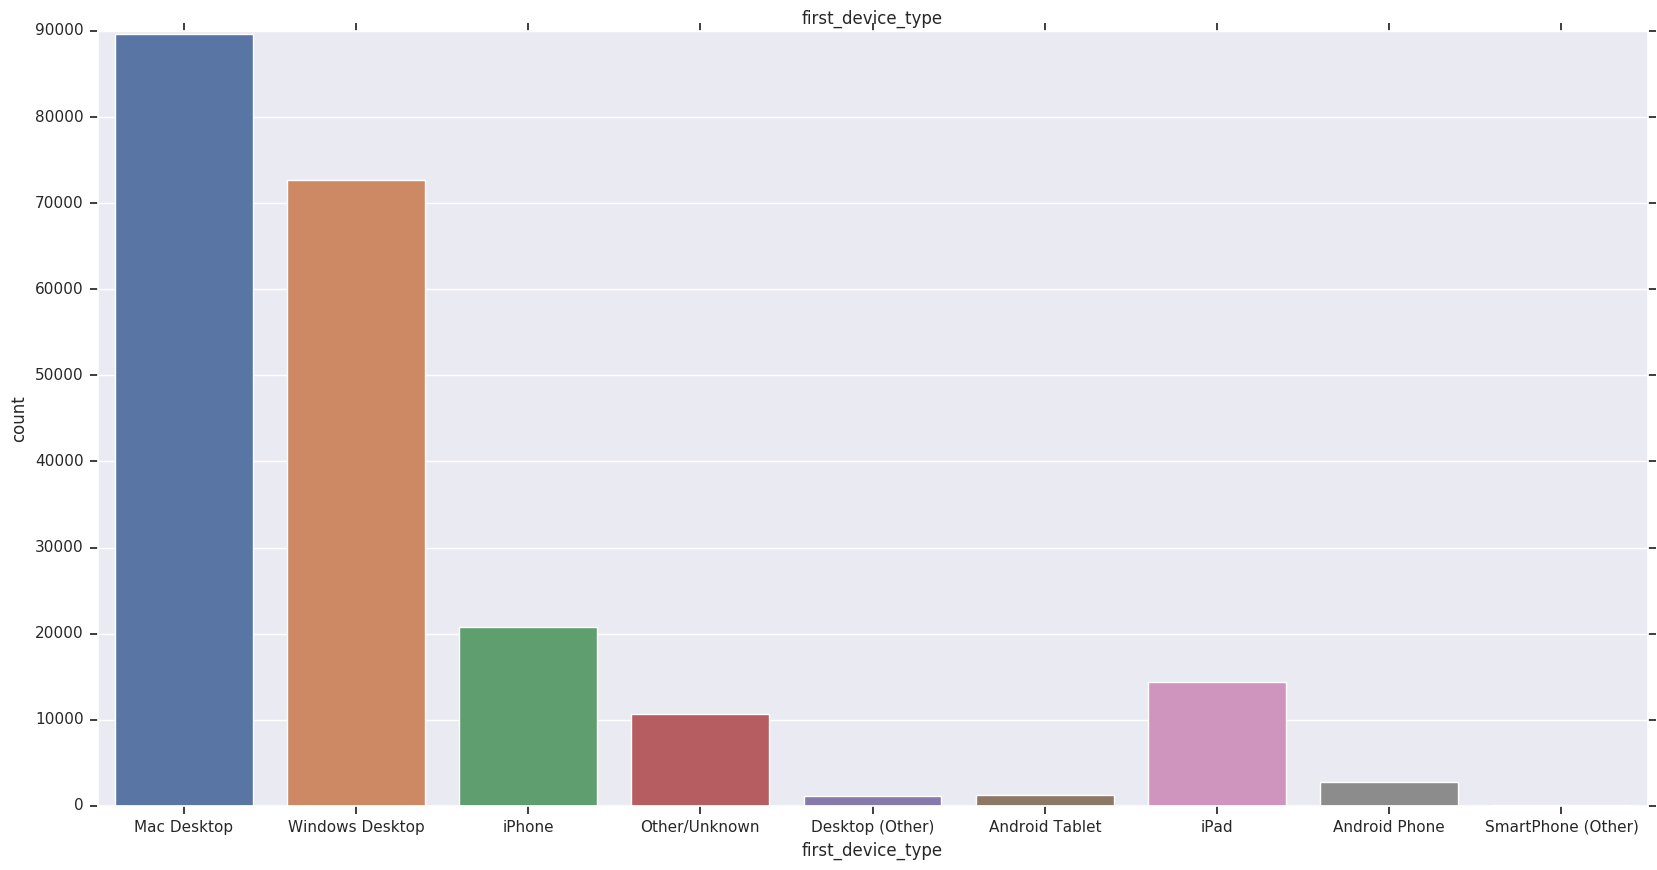

In [ ]:
# first_device_type share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="first_device_type", data=train_df)

plt.title("first_device_type")

plt.show()

1) Majority of users either use Mac or Windows Desktop as first device for booking.

2) iPhone and iPad come next in popularity.

In [ ]:
train_df['first_device_type'].value_counts()

Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64

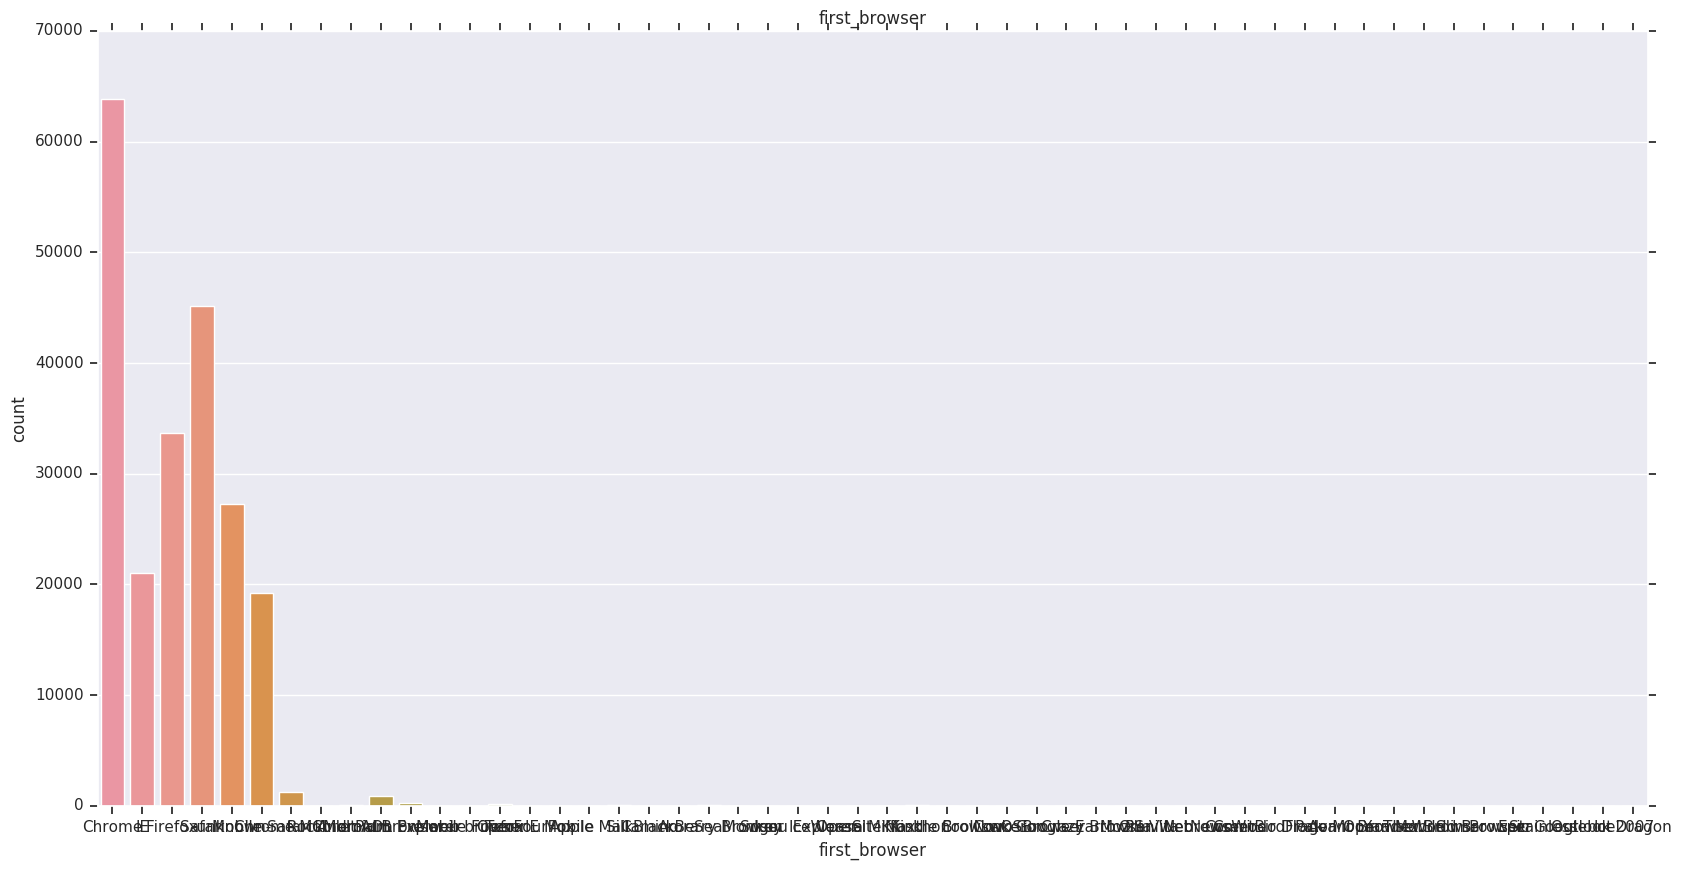

In [ ]:
# first_browser share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="first_browser", data=train_df)

plt.title("first_browser")

plt.show()

1) Majority of the users use chrome,safari,firefox and unknown browsers.

In [ ]:
train_df['first_browser'].value_counts()

Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
Apple Mail                 36
IE Mobile                  36
Sogou Explorer             33
Mobile Firefox             30
RockMelt                   24
SiteKiosk                  24
Iron                       17
IceWeasel                  13
Pale Moon                  12
SeaMonkey                  11
CometBird                  11
Yandex.Browser             11
Camino                      9
TenFourFox                  8
CoolNovo                    6
wOSBrowser                  6
Avant Browser               4
Opera Mini                  4
Mozilla                     3
Opera Mobi

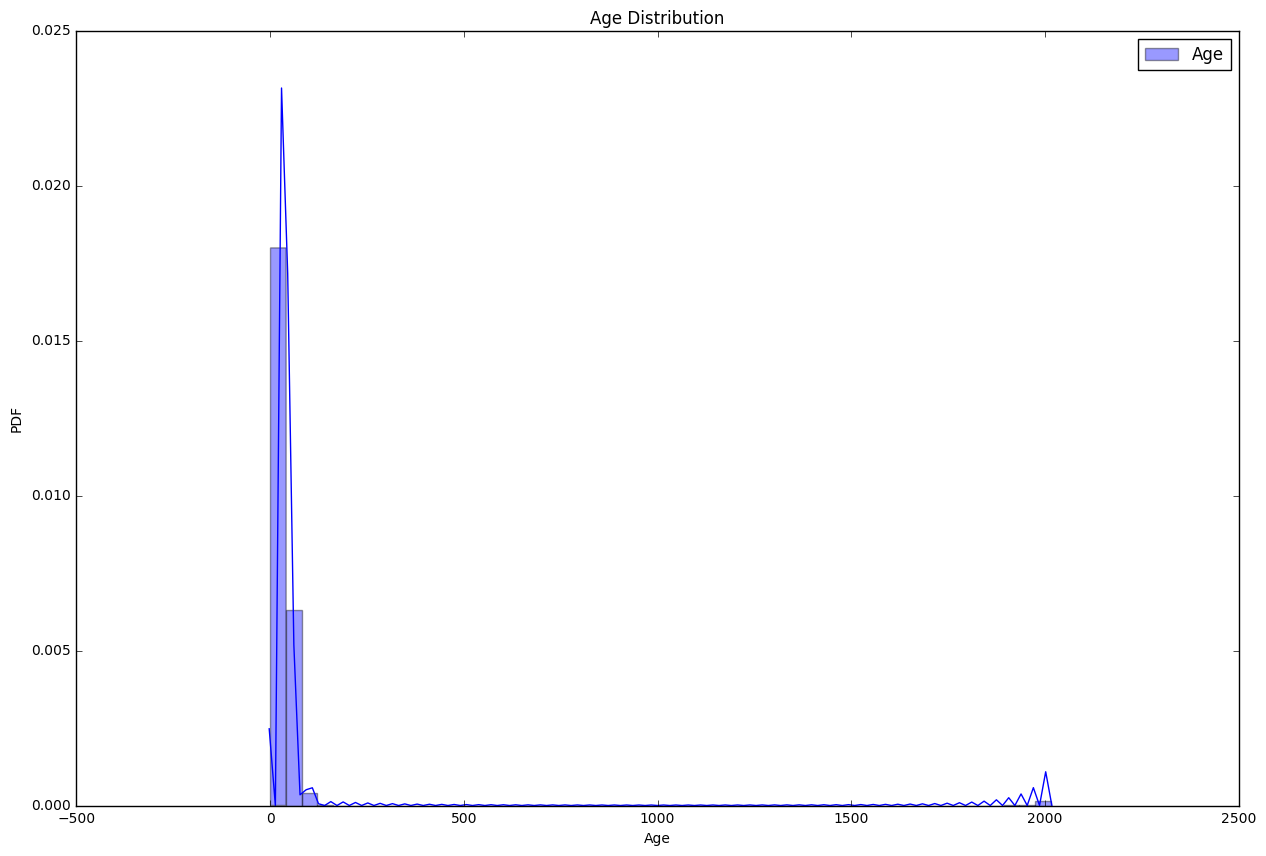

In [ ]:
# Age distribution

plt.figure(figsize=(15,10))

ax = sns.distplot(train_df['age'].dropna(),label="Age")

ax.set_title('Age Distribution')

ax.set(xlabel='Age', ylabel='PDF')

plt.legend()

plt.show()

1) There are many outliers.

2) Some people have filled the year value as DOB.

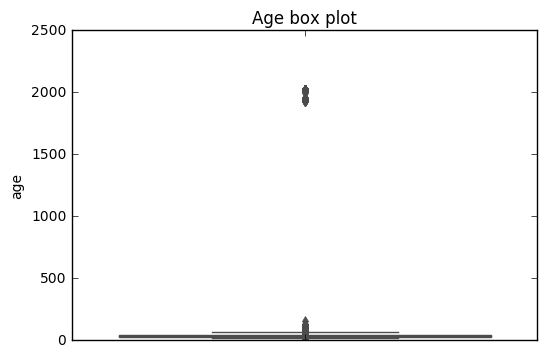

In [ ]:
sns.boxplot(y='age',data=train_df)

plt.title("Age box plot")

plt.show()

1) The skewed box plot shows us the presence of outliers 

In [ ]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers

for i in range(0,110,10):
        
    print("{} percentile value is {}".format(i,np.percentile(train_df['age'].dropna(),i)))


0 percentile value is 1.0
10 percentile value is 25.0
20 percentile value is 27.0
30 percentile value is 29.0
40 percentile value is 32.0
50 percentile value is 34.0
60 percentile value is 36.0
70 percentile value is 40.0
80 percentile value is 46.0
90 percentile value is 56.0
100 percentile value is 2014.0


In [ ]:
#calculating 90-100th percentile to find a the correct percentile value for removal of outliers

for i in range(90,101,1):
        
    print("{} percentile value is {}".format(i,np.percentile(train_df['age'].dropna(),i)))


90 percentile value is 56.0
91 percentile value is 57.0
92 percentile value is 58.0
93 percentile value is 60.0
94 percentile value is 62.0
95 percentile value is 64.0
96 percentile value is 67.0
97 percentile value is 71.0
98 percentile value is 93.0
99 percentile value is 105.0
100 percentile value is 2014.0


In [ ]:
#calculating 0-10th percentile to find a the correct percentile value for removal of outliers

for i in range(0,11,1):
        
    print("{} percentile value is {}".format(i,np.percentile(train_df['age'].dropna(),i)))


0 percentile value is 1.0
1 percentile value is 19.0
2 percentile value is 21.0
3 percentile value is 22.0
4 percentile value is 22.0
5 percentile value is 23.0
6 percentile value is 23.0
7 percentile value is 24.0
8 percentile value is 24.0
9 percentile value is 25.0
10 percentile value is 25.0


In [ ]:
# median replacement with median age = 34.0

def age_median(age):
    
    """
    Function to replace age outliers with median age
    
    parameters: age 
    
    returns : age  
    
    """
    
    if age < 15.0 or age > 100.0: 
        
        return 34.0
  
    else: 
        
        return age


In [ ]:
train_df['age'] = train_df['age'].apply(age_median)

train_df['age'].value_counts()

34.0     7431
30.0     6124
31.0     6016
29.0     5963
28.0     5939
32.0     5855
27.0     5738
33.0     5527
26.0     5044
35.0     4860
25.0     4459
36.0     4083
37.0     3694
38.0     3384
24.0     3220
39.0     2998
40.0     2766
41.0     2538
23.0     2462
42.0     2243
45.0     2149
44.0     2137
43.0     2056
46.0     1875
22.0     1702
47.0     1646
48.0     1469
50.0     1387
51.0     1337
49.0     1331
         ... 
74.0      123
75.0       94
77.0       72
76.0       68
17.0       67
78.0       50
79.0       50
95.0       49
80.0       46
87.0       31
81.0       30
86.0       27
16.0       26
100.0      26
82.0       26
85.0       26
83.0       25
96.0       25
84.0       20
90.0       18
93.0       18
99.0       17
98.0       15
92.0       14
89.0       13
88.0       12
91.0       12
94.0       12
97.0       10
15.0        8
Name: age, dtype: int64

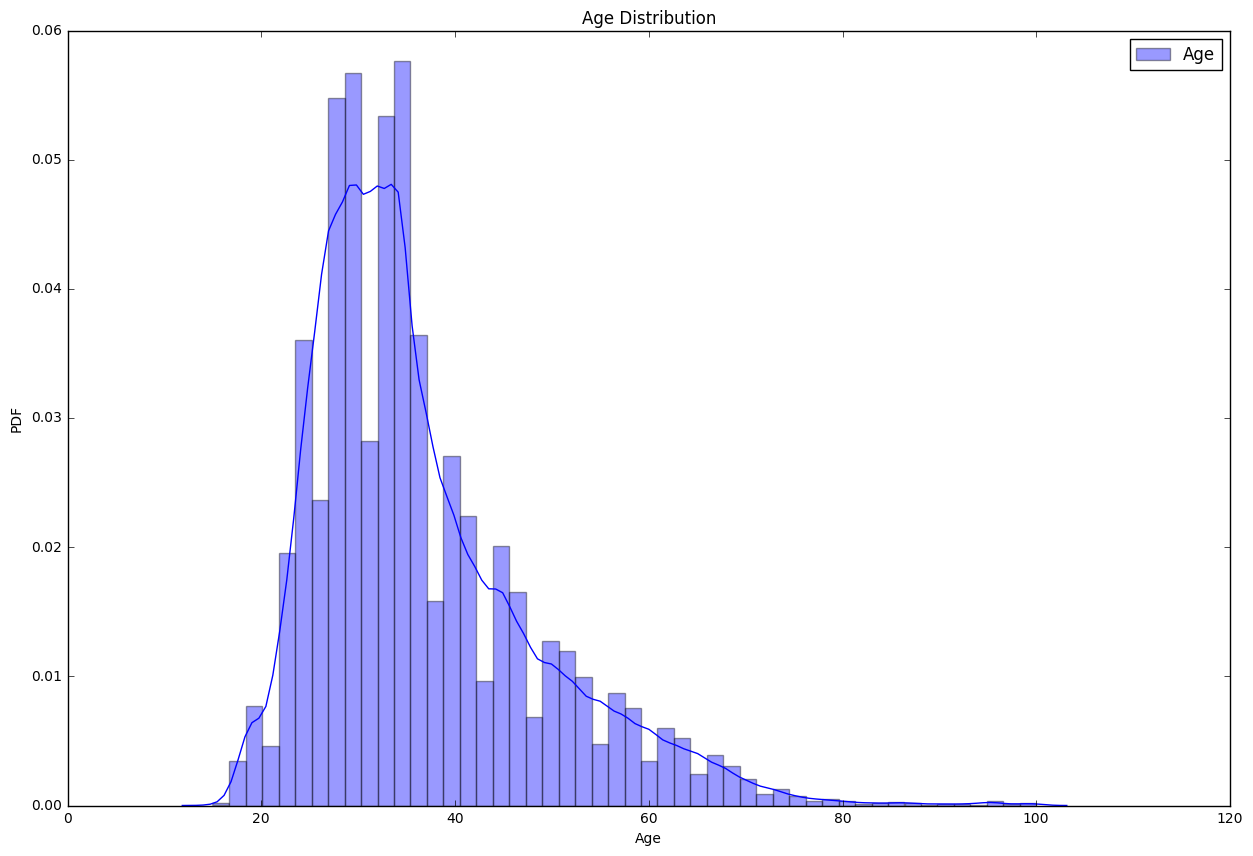

In [ ]:
# Age distribution

plt.figure(figsize=(15,10))

ax = sns.distplot(train_df['age'].dropna(),label="Age")

ax.set_title('Age Distribution')

ax.set(xlabel='Age', ylabel='PDF')

plt.legend()

plt.show()

1) outliers removed , most ages concentrated bw 20-40 with median age = 34

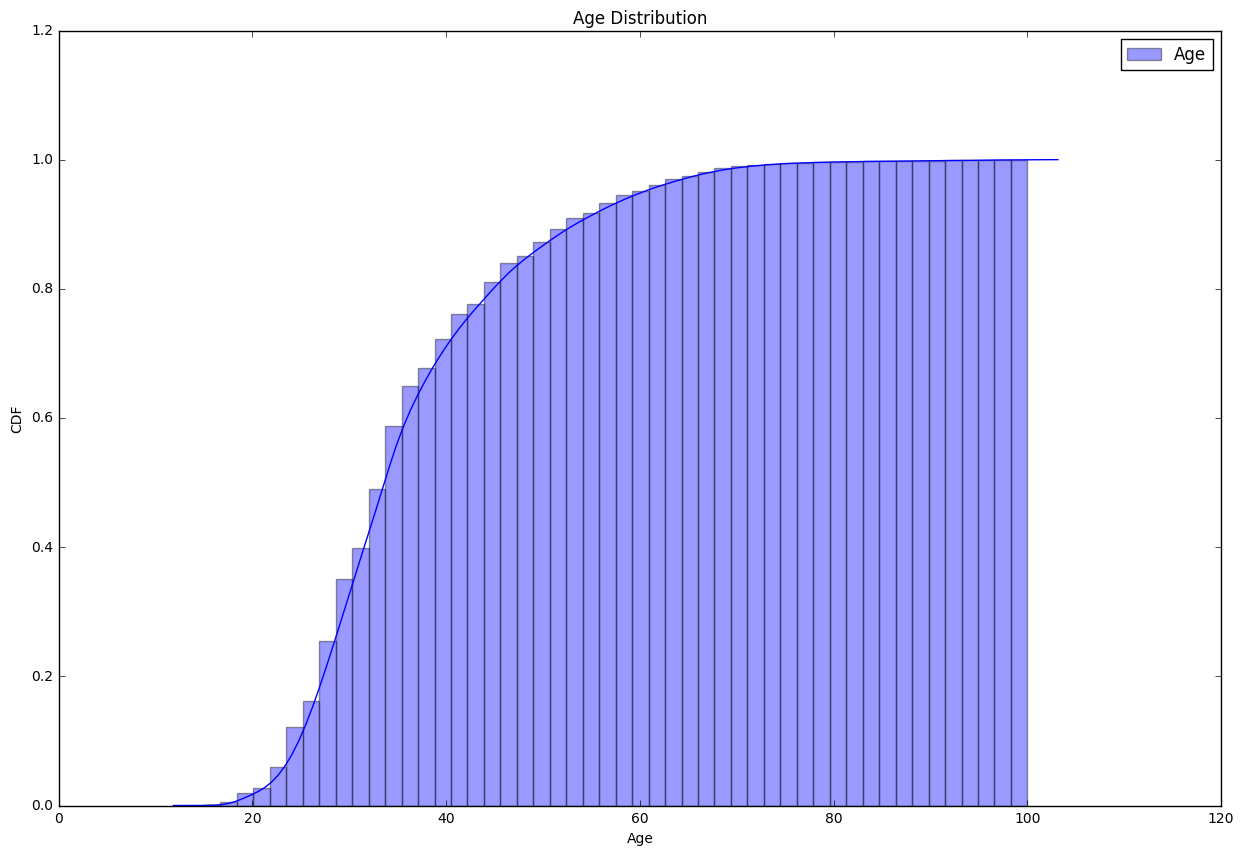

In [ ]:
# Age distribution cdf

plt.figure(figsize=(15,10))

kwargs = {'cumulative': True}

ax = sns.distplot(train_df['age'].dropna(),label="Age", hist_kws=kwargs, kde_kws=kwargs)

ax.set_title('Age Distribution')

ax.set(xlabel='Age', ylabel='CDF')

plt.legend()

plt.show()

1) 60% of the population has age less than 40.

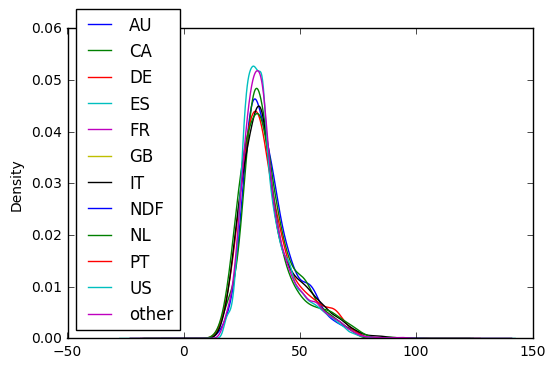

In [ ]:
train_df.groupby("country_destination").age.plot(kind='kde',legend=True)

plt.figure(figsize=(20,10))

plt.show()

1) We can differentiate the countries based on the age of the users.

In [ ]:
# daily,monthly and yearly data

train_df['date_account_created'] = pd.to_datetime(train_df['date_account_created'])

train_df['date_account_created_day'] = train_df.date_account_created.dt.weekday

train_df['date_account_created_month'] = train_df.date_account_created.dt.month

train_df['date_account_created_year'] = train_df.date_account_created.dt.year

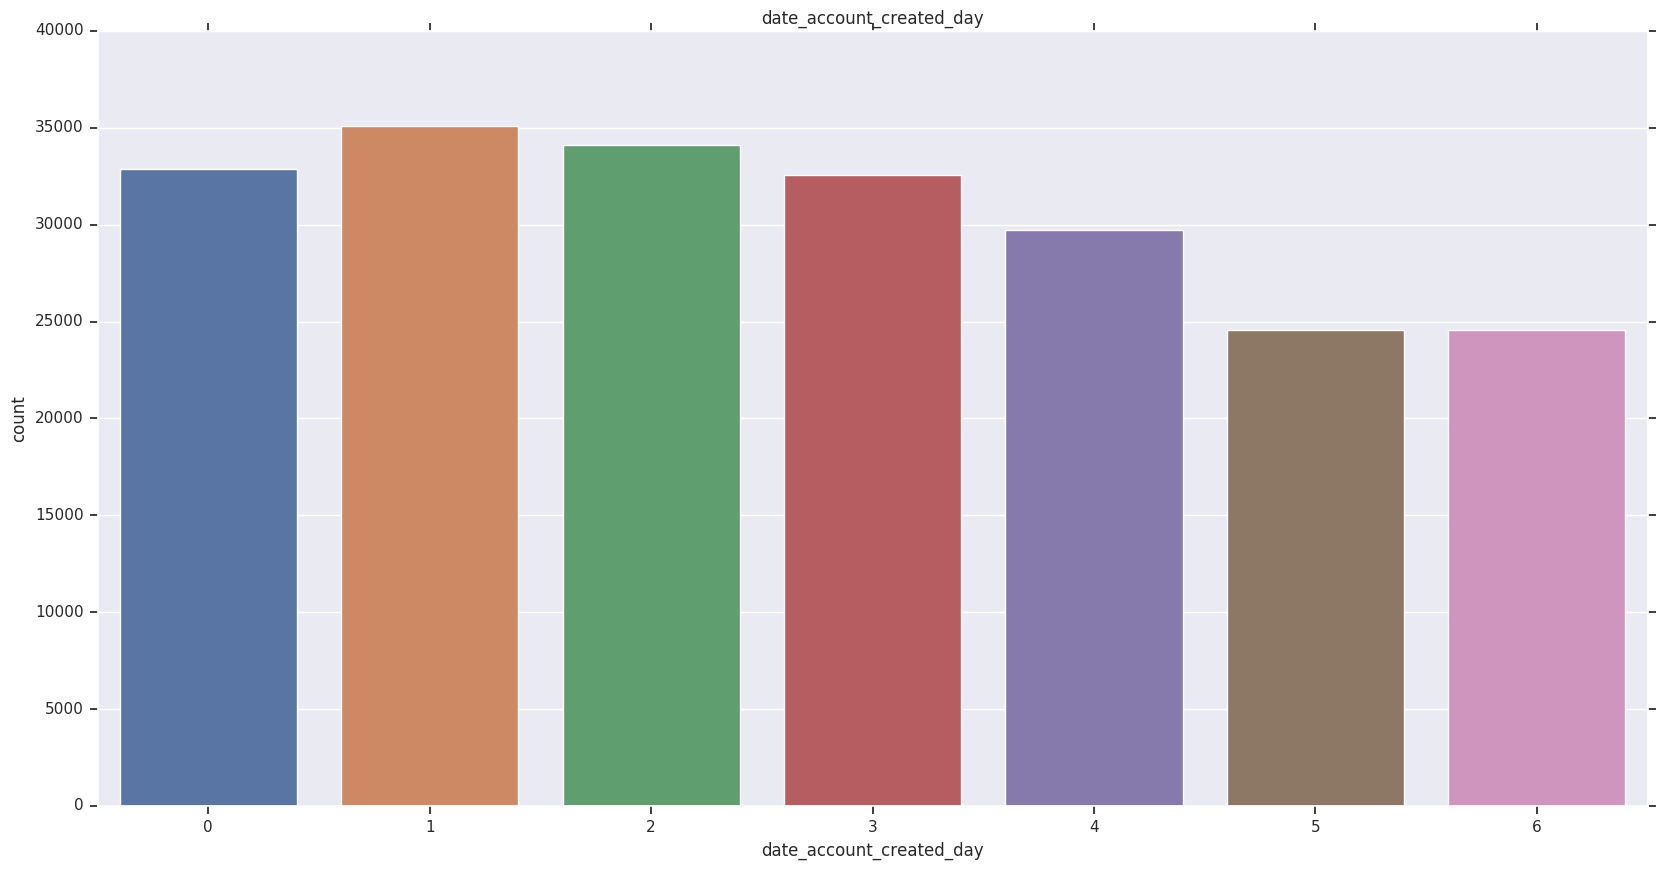

In [ ]:
# date_account_created_day share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="date_account_created_day", data=train_df)

plt.title("date_account_created_day")

plt.show()

1) Most accounts are created on tuesdays and wednesdays.

2) Least no of accounts are created on saturdays and sundays.

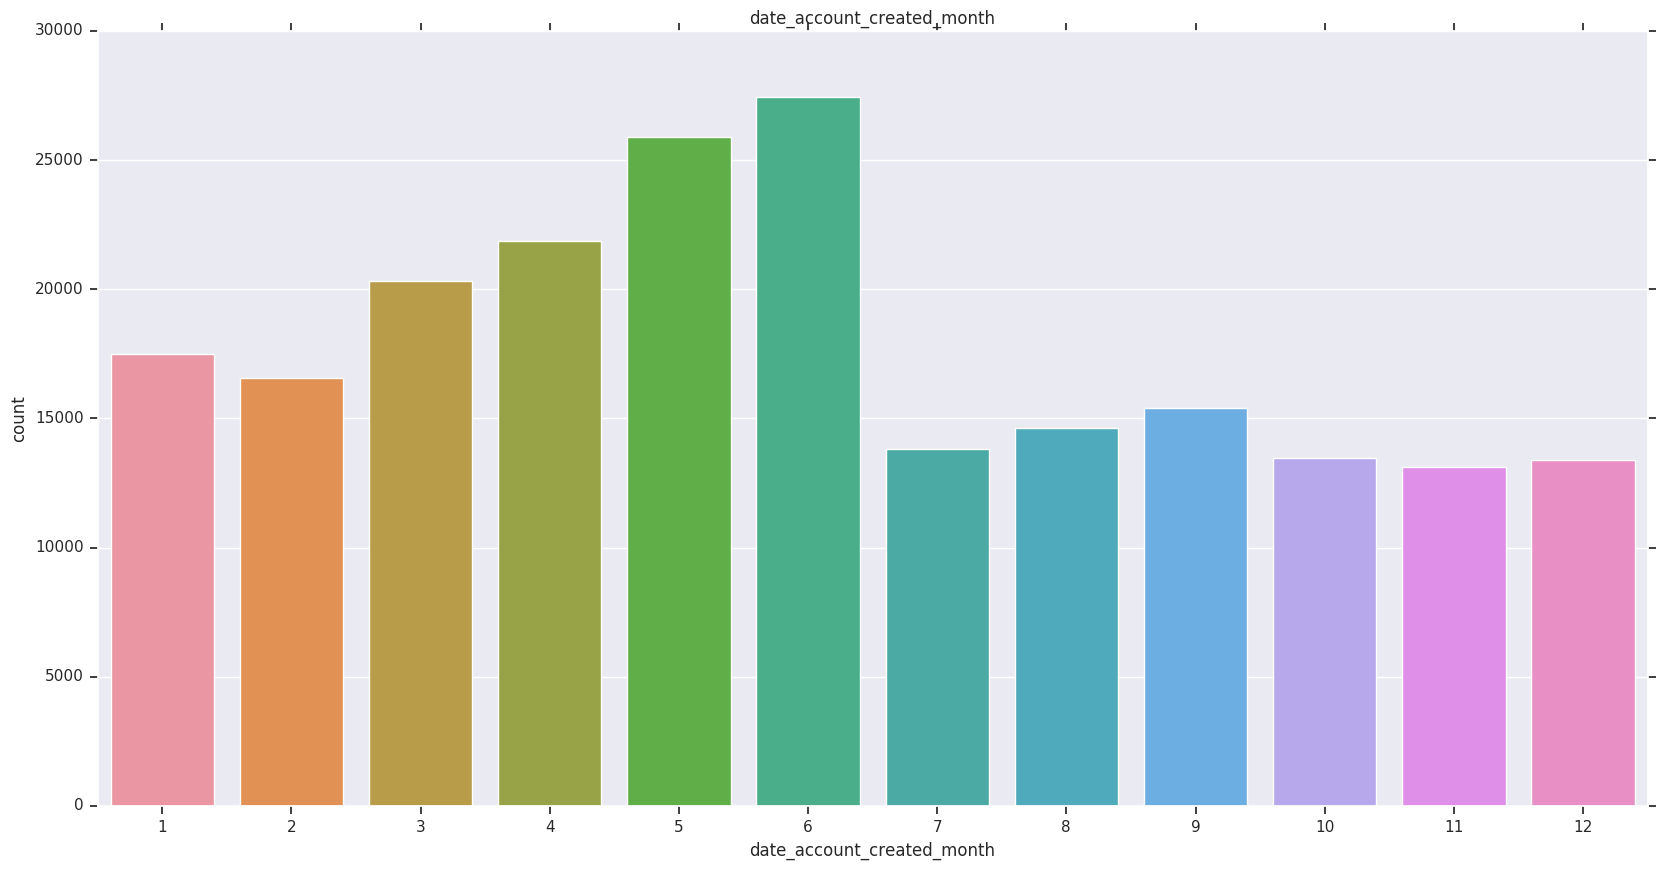

In [ ]:
# date_account_created_day share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="date_account_created_month", data=train_df)

plt.title("date_account_created_month")

plt.show()

1) Most accounts created in May and June.

2) Least no of accounts are created in October,November and December.

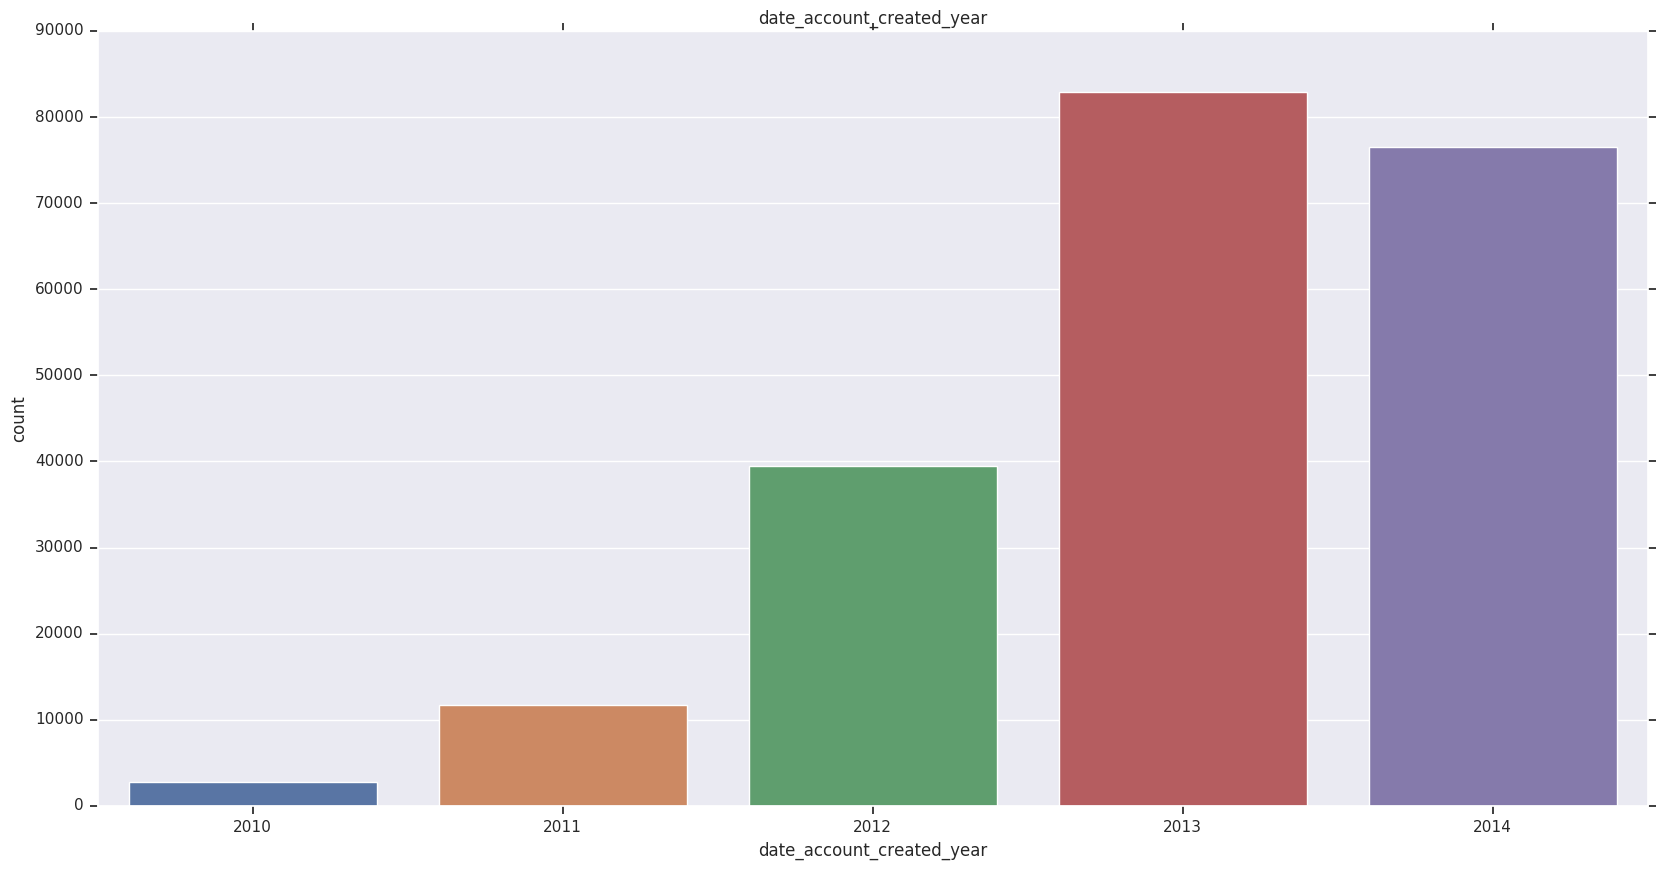

In [ ]:
# date_account_created_day share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="date_account_created_year", data=train_df)

plt.title("date_account_created_year")

plt.show()

1) Airbnb's popularity has increased exponentially from 2010 to 2014.

2) Dip in 2014 indicates test data has been taken from 2014.

# Bivariate plotting

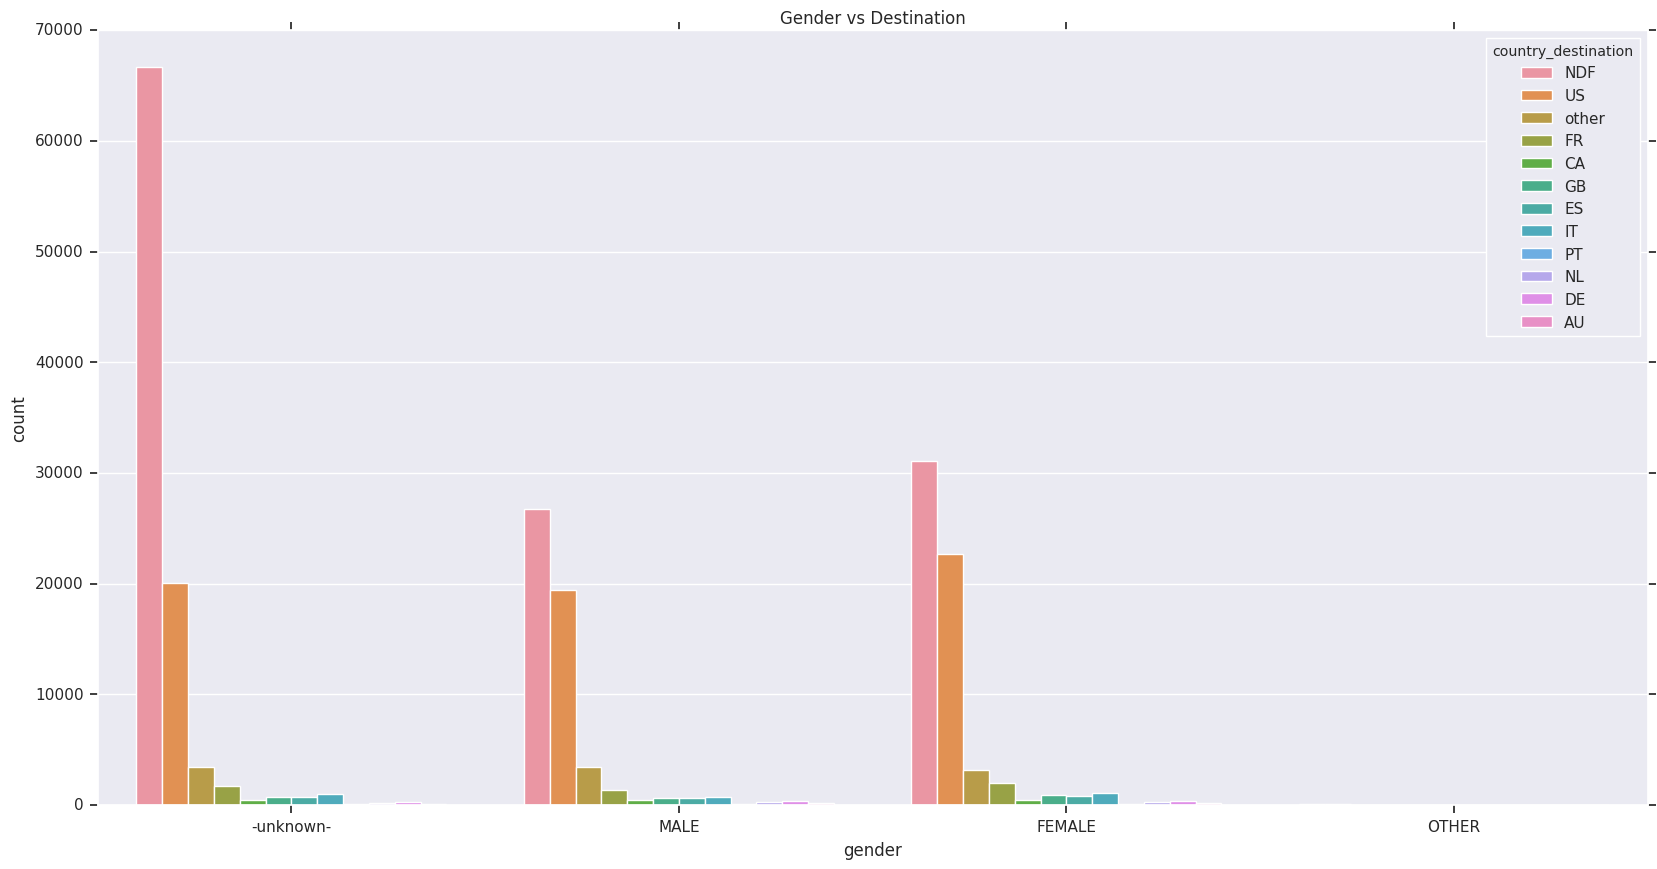

In [ ]:
# gender share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="gender", hue="country_destination", data=train_df)

plt.title("Gender vs Destination")

plt.show()

1) Majority of users travel to 'other' after NDF and US.

2) France's share in female users is more than male users.

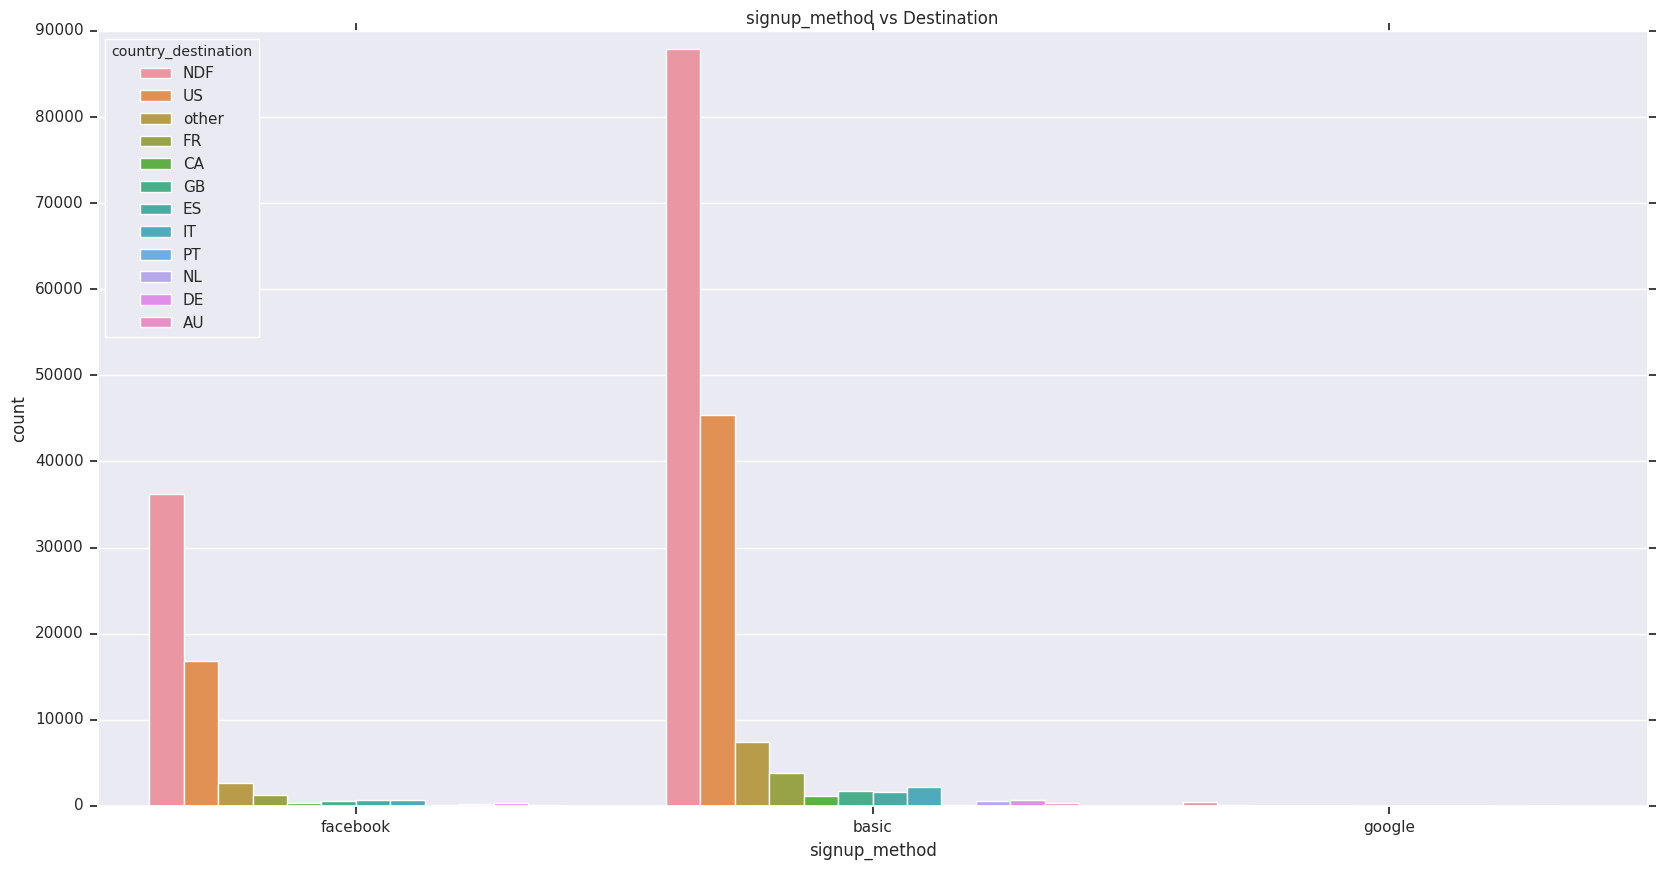

In [ ]:
# signup_method share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="signup_method", hue="country_destination", data=train_df)

plt.title("signup_method vs Destination")

plt.show()

1) Negligible signups happening from google

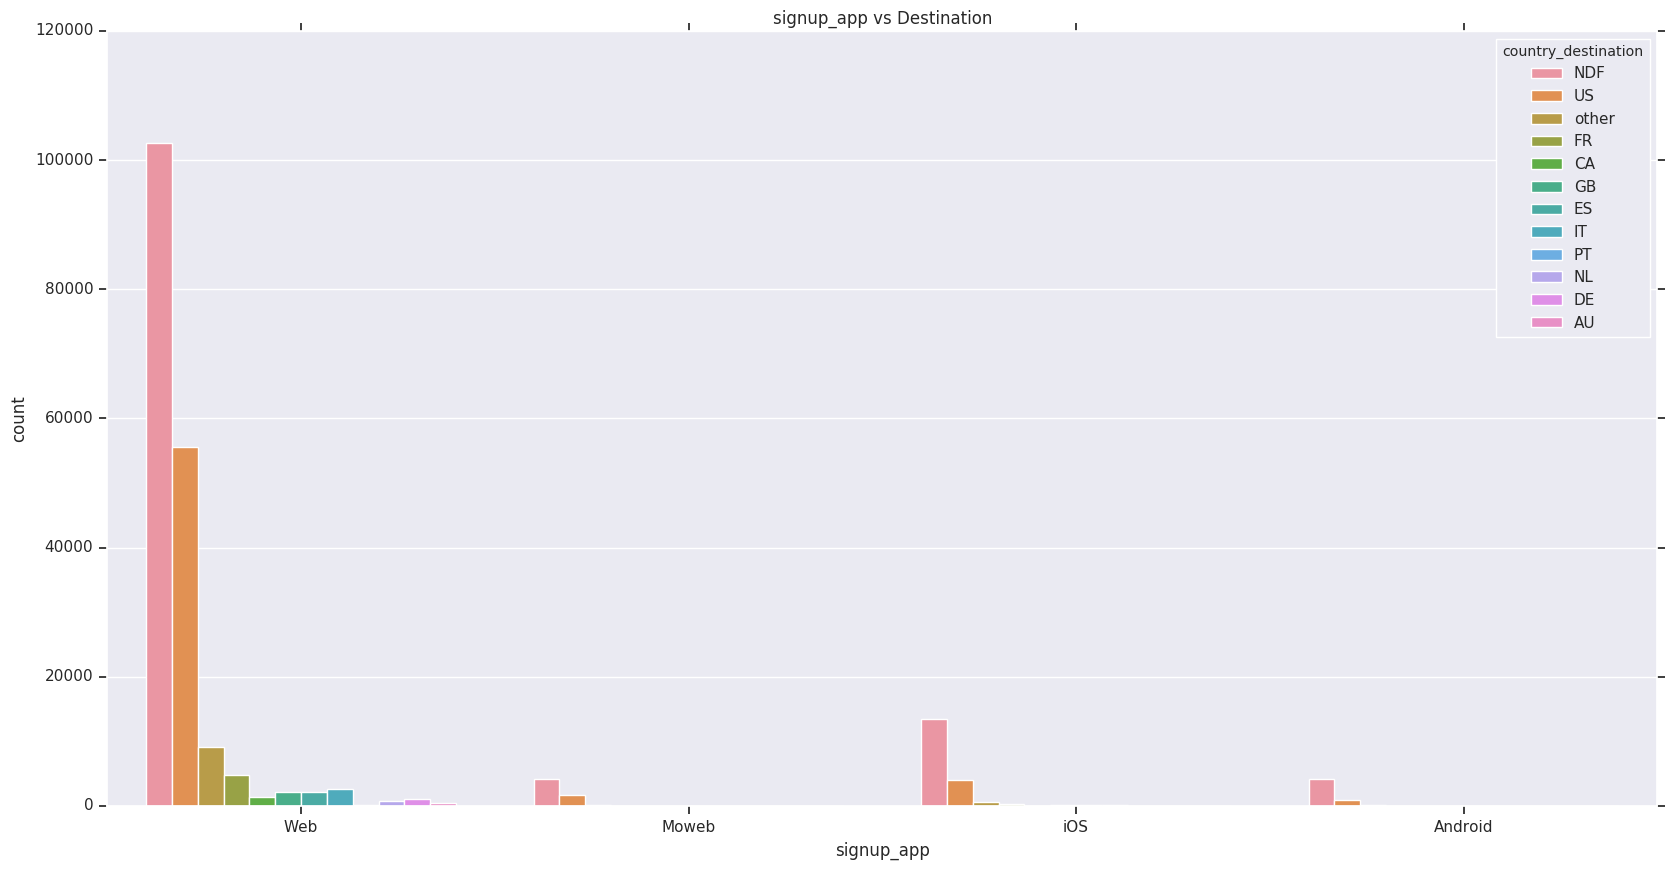

In [ ]:
# signup_app share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="signup_app", hue="country_destination", data=train_df)

plt.title("signup_app vs Destination")

plt.show()

1) Least no of users use Android as compared to web,ios,Moweb

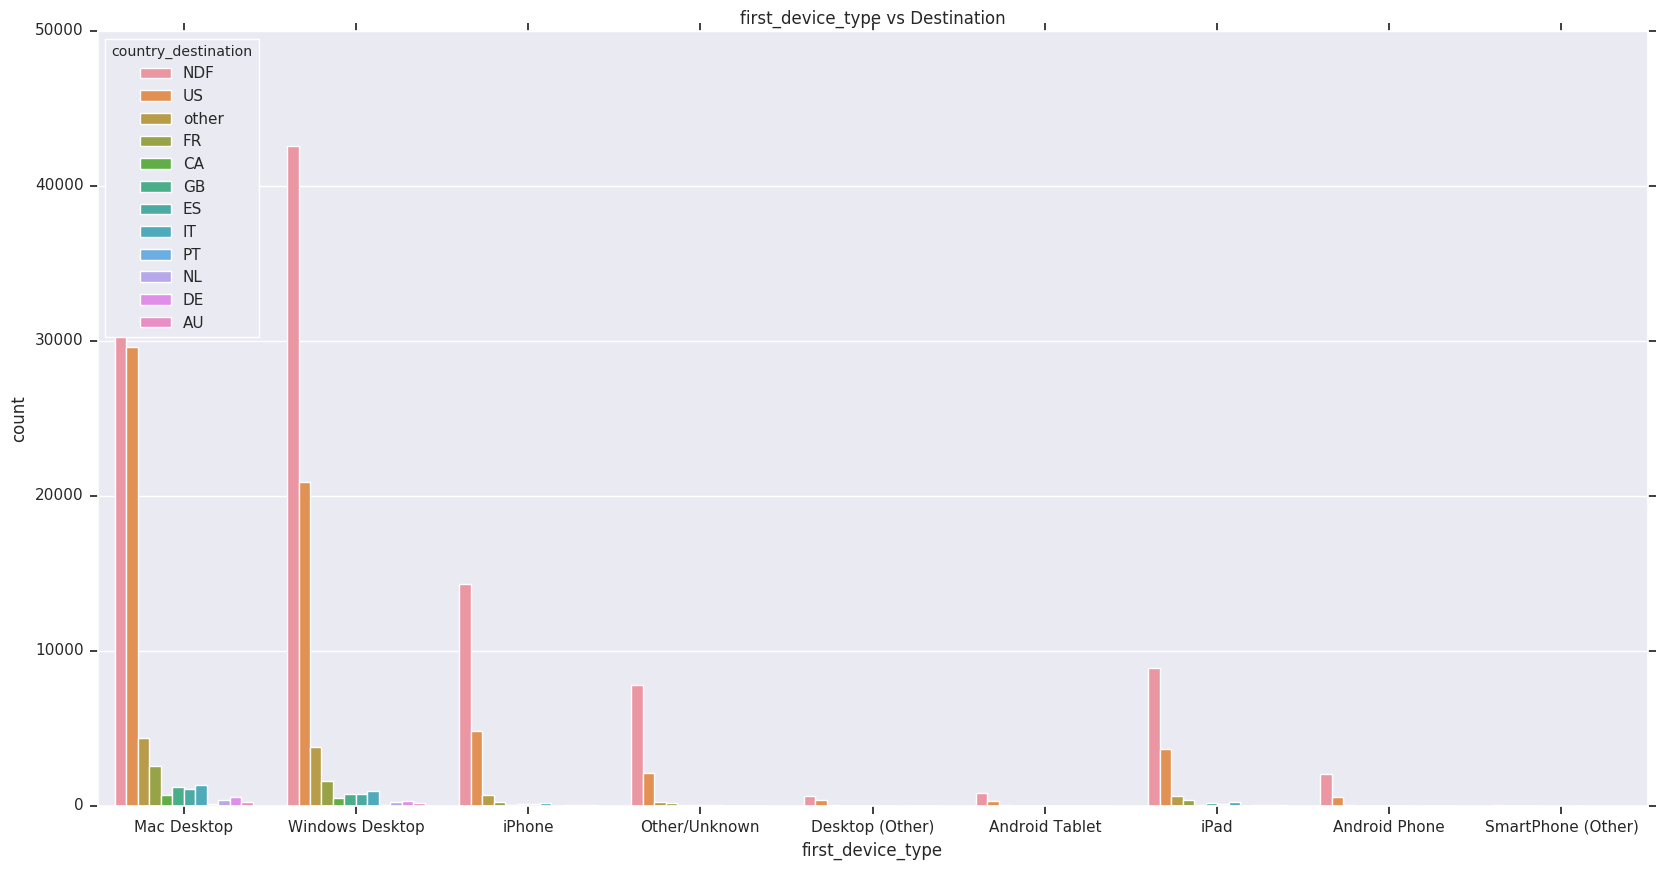

In [ ]:
# first_device_type share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="first_device_type", hue="country_destination", data=train_df)

plt.title("first_device_type vs Destination")

plt.show()

1) Most bookings for counties other than NDF and US come from Mac Desktop and Windows Desktop

# Wordcloud plotting

In [ ]:
train_merge.shape

(73815, 22)

In [ ]:
train_merge.head()

id date_account_created  timestamp_first_active date_first_booking  \
0  d1mm9tcy42           2014-01-01          20140101000936         2014-01-04   
1  yo8nz8bqcq           2014-01-01          20140101001558                NaN   
2  4grx6yxeby           2014-01-01          20140101001639                NaN   
3  ncf87guaf0           2014-01-01          20140101002146                NaN   
4  4rvqpxoh3h           2014-01-01          20140101002619         2014-01-02   

      gender   age signup_method  signup_flow language affiliate_channel  \
0       MALE  62.0         basic            0       en     sem-non-brand   
1  -unknown-   NaN         basic            0       en            direct   
2  -unknown-   NaN         basic            0       en         sem-brand   
3  -unknown-   NaN         basic            0       en            direct   
4  -unknown-   NaN         basic           25       en            direct   

                         ...                         signup_app  \
0                        ...                                Web   
1                        ...                                Web   
2                        ...                                Web   
3                        ...                                Web   
4                        ...                                iOS   

  first_device_type first_browser country_destination     user_id  \
0   Windows Desktop        Chrome               other  d1mm9tcy42   
1       Mac Desktop       Firefox                 NDF  yo8nz8bqcq   
2   Windows Desktop       Firefox                 NDF  4grx6yxeby   
3   Windows Desktop        Chrome                 NDF  ncf87guaf0   
4            iPhone     -unknown-                  GB  4rvqpxoh3h   

                                              action  \
0  [lookup, search_results, lookup, search_result...   
1  [dashboard, create, confirm_email, show, show_...   
2  [verify, create, nan, pending, requested, head...   
3  [lookup, show, search_results, search_results,...   
4  [campaigns, active, create, notifications, lis...   

                                         action_type  \
0  [nan, click, nan, click, nan, click, nan, data...   
1  [view, submit, click, view, data, view, data, ...   
2  [-unknown-, submit, message_post, booking_requ...   
3  [nan, view, click, click, view, view, click, d...   
4  [-unknown-, -unknown-, -unknown-, -unknown-, -...   

                                       action_detail  \
0  [nan, view_search_results, nan, view_search_re...   
1  [dashboard, create_user, confirm_email_link, p...   
2  [-unknown-, create_user, message_post, pending...   
3  [nan, p3, view_search_results, view_search_res...   
4  [-unknown-, -unknown-, -unknown-, -unknown-, -...   

                                         device_type  \
0  [Windows Desktop, Windows Desktop, Windows Des...   
1  [Mac Desktop, Mac Desktop, Mac Desktop, Mac De...   
2  [Windows Desktop, Windows Desktop, Windows Des...   
3  [Windows Desktop, Windows Desktop, Windows Des...   
4  [iPhone, iPhone, iPhone, iPhone, iPhone, iPhon...   

                                        secs_elapsed  
0  [319.0, 67753.0, 301.0, 22141.0, 435.0, 7703.0...  
1  [2739.0, nan, 115983.0, 20285.0, 3255.0, 47308...  
2  [65080.0, nan, 59801.0, 1000.0, 1624.0, 5134.0...  
3  [2204.0, 10834.0, 575.0, 578.0, 12407.0, 829.0...  
4  [375.0, 728.0, nan, 187.0, 154.0, 204.0, 21.0,...  

[5 rows x 22 columns]

In [ ]:
#https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy

temp_df = train_merge[['action', 'action_type', 'action_detail','device_type','secs_elapsed','country_destination']].copy()

temp_df.head()

action  \
0  [lookup, search_results, lookup, search_result...   
1  [dashboard, create, confirm_email, show, show_...   
2  [verify, create, nan, pending, requested, head...   
3  [lookup, show, search_results, search_results,...   
4  [campaigns, active, create, notifications, lis...   

                                         action_type  \
0  [nan, click, nan, click, nan, click, nan, data...   
1  [view, submit, click, view, data, view, data, ...   
2  [-unknown-, submit, message_post, booking_requ...   
3  [nan, view, click, click, view, view, click, d...   
4  [-unknown-, -unknown-, -unknown-, -unknown-, -...   

                                       action_detail  \
0  [nan, view_search_results, nan, view_search_re...   
1  [dashboard, create_user, confirm_email_link, p...   
2  [-unknown-, create_user, message_post, pending...   
3  [nan, p3, view_search_results, view_search_res...   
4  [-unknown-, -unknown-, -unknown-, -unknown-, -...   

                                         device_type  \
0  [Windows Desktop, Windows Desktop, Windows Des...   
1  [Mac Desktop, Mac Desktop, Mac Desktop, Mac De...   
2  [Windows Desktop, Windows Desktop, Windows Des...   
3  [Windows Desktop, Windows Desktop, Windows Des...   
4  [iPhone, iPhone, iPhone, iPhone, iPhone, iPhon...   

                                        secs_elapsed country_destination  
0  [319.0, 67753.0, 301.0, 22141.0, 435.0, 7703.0...               other  
1  [2739.0, nan, 115983.0, 20285.0, 3255.0, 47308...                 NDF  
2  [65080.0, nan, 59801.0, 1000.0, 1624.0, 5134.0...                 NDF  
3  [2204.0, 10834.0, 575.0, 578.0, 12407.0, 829.0...                 NDF  
4  [375.0, 728.0, nan, 187.0, 154.0, 204.0, 21.0,...                  GB

In [ ]:
# Function to convert list into strings

def abcd(action):
    
    """
    Function to convert list into strings
    
    parameters: action 
    
    returns : action  
    
    """
    action = [ str(i) for i in action ]
    
    action = [ re.sub('nan','',i) for i in action ] 
    
    action = ' '.join(action)
    
    return action

In [ ]:
temp_df['action'] = temp_df['action'].apply(abcd)

temp_df['action'].head()

0    lookup search_results lookup search_results lo...
1    dashboard create confirm_email show show_perso...
2    verify create  pending requested header_userpi...
3    lookup show search_results search_results show...
4    campaigns active create notifications listings...
Name: action, dtype: object

In [ ]:
temp_df['action_type'] = temp_df['action_type'].apply(abcd)

temp_df['action_type'].head()

0     click  click  click  data view  click  data v...
1          view submit click view data view data data 
2    -unknown- submit message_post booking_request ...
3     view click click view view click data data da...
4    -unknown- -unknown- -unknown- -unknown- -unkno...
Name: action_type, dtype: object

In [ ]:
temp_df['action_detail'] = temp_df['action_detail'].apply(abcd)

temp_df['action_detail'].head()

0     view_search_results  view_search_results  vie...
1    dashboard create_user confirm_email_link p3 us...
2    -unknown- create_user message_post pending p5 ...
3     p3 view_search_results view_search_results p3...
4    -unknown- -unknown- -unknown- -unknown- -unkno...
Name: action_detail, dtype: object

In [ ]:
temp_df['device_type'] = temp_df['device_type'].apply(abcd)

temp_df['device_type'].head()

0    Windows Desktop Windows Desktop Windows Deskto...
1    Mac Desktop Mac Desktop Mac Desktop Mac Deskto...
2    Windows Desktop Windows Desktop Windows Deskto...
3    Windows Desktop Windows Desktop Windows Deskto...
4    iPhone iPhone iPhone iPhone iPhone iPhone iPho...
Name: device_type, dtype: object

In [ ]:
# Function to convert list into strings

def efgh(device):
    
    """
    Function to convert list into strings
    
    parameters: device 
    
    returns : device  
    
    """
    
    device = device.split()
    
    device = ' '.join(set(device))
    
    return device

In [ ]:
temp_df['device_type'] = temp_df['device_type'].apply(efgh)

temp_df['device_type'].head()

0                  Windows Desktop -unknown-
1                                Desktop Mac
2                  Windows Desktop -unknown-
3    Android Windows Desktop -unknown- Phone
4                                     iPhone
Name: device_type, dtype: object

In [ ]:
# Function to convert list into strings

def ijkl(time):
    
    """
    Function to convert list into strings
    
    parameters: time 
    
    returns : time  
    
    """
    
    float_time = []
    
    time = [ str(i) for i in time ]
    
    time = [ re.sub('nan','',i) for i in time ] 
        
    for i in time:
        
         try:
                
                float_time.append(float(i))
         
         except ValueError:
                
                continue
    
    float_time = sum(float_time)
    
    return float_time

In [ ]:
temp_df['secs_elapsed'] = temp_df['secs_elapsed'].apply(ijkl)

temp_df['secs_elapsed'].head()

0    3427529.0
1     207842.0
2    1135444.0
3    3755100.0
4       2555.0
Name: secs_elapsed, dtype: float64

In [ ]:
temp_df.head()

action  \
0  lookup search_results lookup search_results lo...   
1  dashboard create confirm_email show show_perso...   
2  verify create  pending requested header_userpi...   
3  lookup show search_results search_results show...   
4  campaigns active create notifications listings...   

                                         action_type  \
0   click  click  click  data view  click  data v...   
1        view submit click view data view data data    
2  -unknown- submit message_post booking_request ...   
3   view click click view view click data data da...   
4  -unknown- -unknown- -unknown- -unknown- -unkno...   

                                       action_detail  \
0   view_search_results  view_search_results  vie...   
1  dashboard create_user confirm_email_link p3 us...   
2  -unknown- create_user message_post pending p5 ...   
3   p3 view_search_results view_search_results p3...   
4  -unknown- -unknown- -unknown- -unknown- -unkno...   

                               device_type  secs_elapsed country_destination  
0                Windows Desktop -unknown-     3427529.0               other  
1                              Desktop Mac      207842.0                 NDF  
2                Windows Desktop -unknown-     1135444.0                 NDF  
3  Android Windows Desktop -unknown- Phone     3755100.0                 NDF  
4                                   iPhone        2555.0                  GB

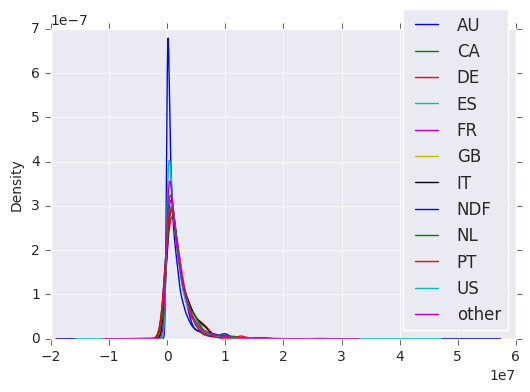

In [ ]:
temp_df.groupby("country_destination").secs_elapsed.plot(kind='kde',legend=True)

plt.figure(figsize=(20,10))

plt.show()

1) We can differentiate the countries based on the total time taken by the users to choose the country.

In [ ]:
temp_df_NDF = temp_df[temp_df['country_destination'] == 'NDF']

temp_df_NDF.head()

action  \
1  dashboard create confirm_email show show_perso...   
2  verify create  pending requested header_userpi...   
3  lookup show search_results search_results show...   
5                confirm_email header_userpic create   
7  ajax_refresh_subtotal personalize show persona...   

                                         action_type  \
1        view submit click view data view data data    
2  -unknown- submit message_post booking_request ...   
3   view click click view view click data data da...   
5                                  click data submit   
7  click data view data view -unknown- data submi...   

                                       action_detail  \
1  dashboard create_user confirm_email_link p3 us...   
2  -unknown- create_user message_post pending p5 ...   
3   p3 view_search_results view_search_results p3...   
5      confirm_email_link header_userpic create_user   
7  change_trip_characteristics wishlist_content_u...   

                               device_type  \
1                              Desktop Mac   
2                Windows Desktop -unknown-   
3  Android Windows Desktop -unknown- Phone   
5                              iPad Tablet   
7                          Windows Desktop   

                                        secs_elapsed country_destination  
1  [2739.0, nan, 115983.0, 20285.0, 3255.0, 47308...                 NDF  
2  [65080.0, nan, 59801.0, 1000.0, 1624.0, 5134.0...                 NDF  
3  [2204.0, 10834.0, 575.0, 578.0, 12407.0, 829.0...                 NDF  
5                           [1371616.0, 8672.0, nan]                 NDF  
7  [552.0, 837.0, 6576.0, 1439.0, 40640.0, 63154....                 NDF

100%|██████████| 45041/45041 [00:01<00:00, 38068.48it/s]


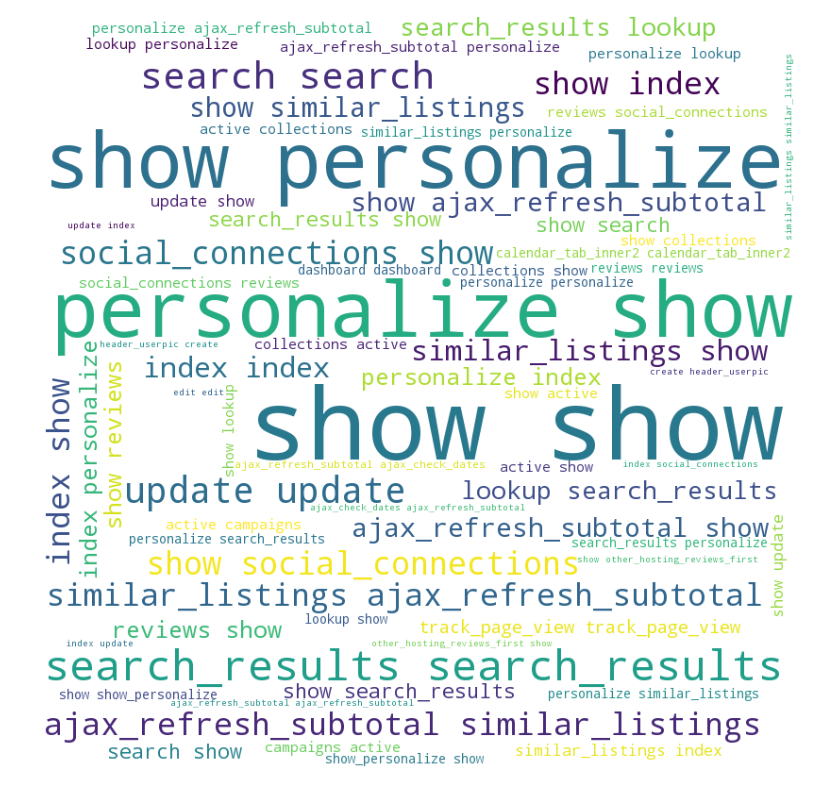

In [ ]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
  
for val in tqdm(temp_df_NDF['action']): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

1) To see the most frequent actions with NDF.

100%|██████████| 45041/45041 [00:00<00:00, 45491.23it/s]


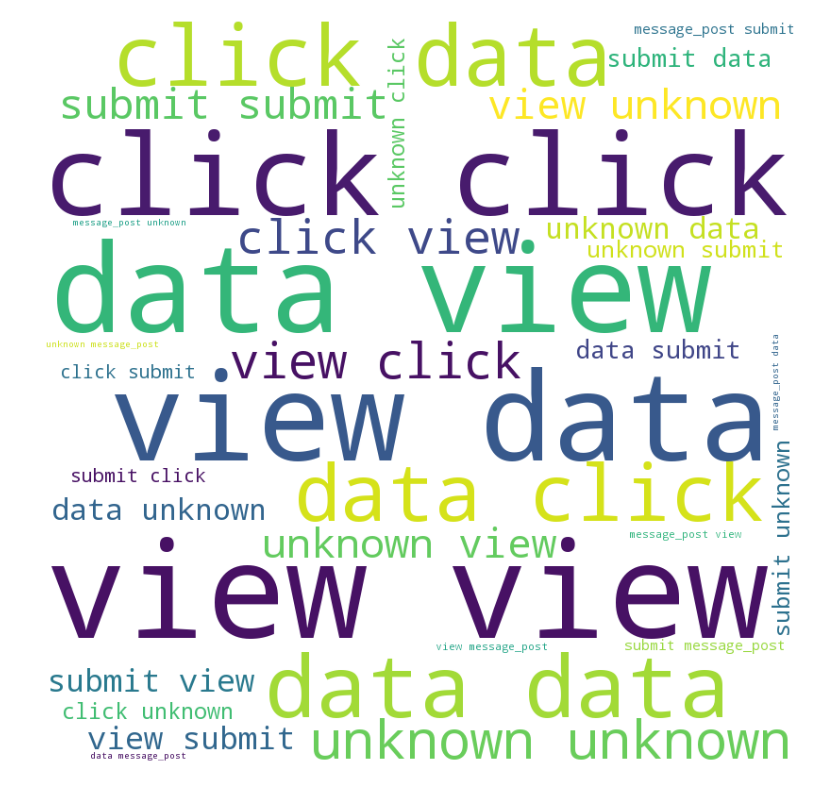

In [ ]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
  
for val in tqdm(temp_df_NDF['action_type']): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

1) To see the most frequent action_type with NDF.

100%|██████████| 45041/45041 [00:01<00:00, 42023.83it/s]


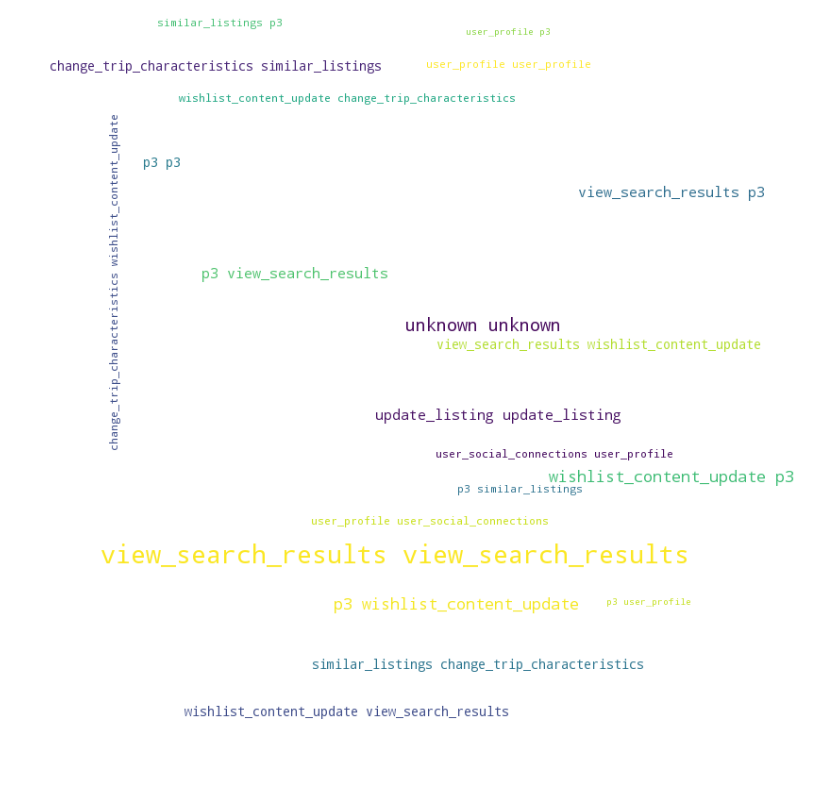

In [ ]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
  
for val in tqdm(temp_df_NDF['action_detail']): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

1) To see the most frequent action_detail with NDF.

100%|██████████| 45041/45041 [00:00<00:00, 307522.94it/s]


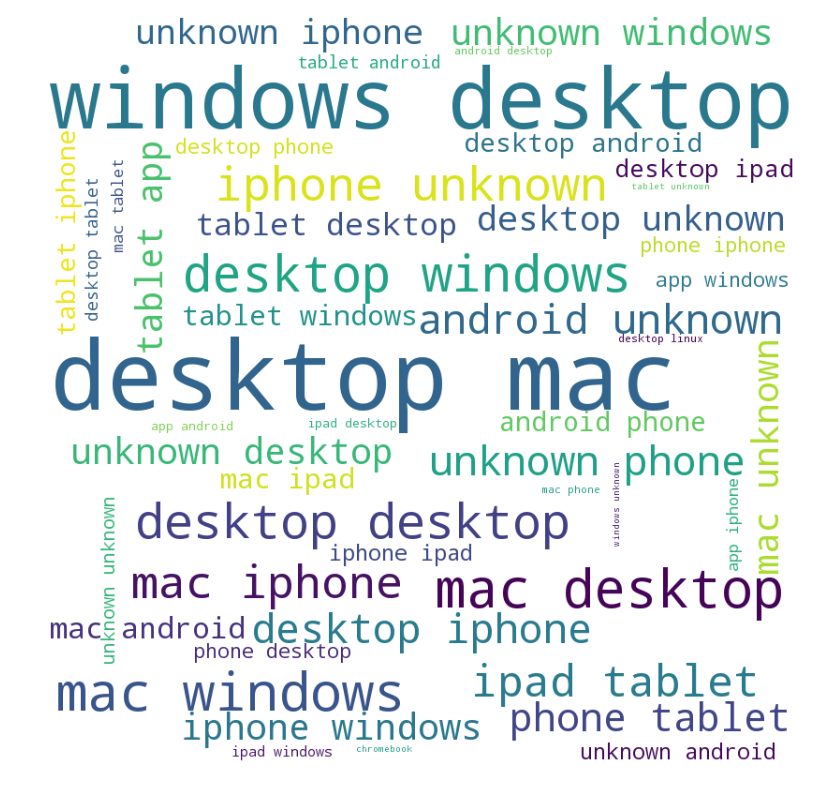

In [ ]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
  
for val in tqdm(temp_df_NDF['device_type']): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

1) To see the most frequent device_type with NDF.

In [ ]:
temp_df_US = temp_df[temp_df['country_destination'] == 'US']

temp_df_US.head()

action  \
6   dashboard header_userpic  ask_question ask_que...   
10  ask_question  dashboard login authenticate hea...   
15  show ajax_refresh_subtotal similar_listings sh...   
26  lookup index hosting_social_proof hosting_soci...   
33  index at_checkpoint create travel_plans_curren...   

                                          action_type  \
6   view data message_post submit submit message_p...   
10  submit message_post view view submit data -unk...   
15   click data view view data  click view view vi...   
26   view -unknown- -unknown-  data  view data  cl...   
33  -unknown- booking_request submit view message_...   

                                        action_detail         device_type  \
6   dashboard header_userpic message_post contact_...  iPhone iPad Tablet   
10  contact_host message_post dashboard login_page...  iPhone iPad Tablet   
15   change_trip_characteristics similar_listings ...         iPad Tablet   
26   message_thread -unknown- -unknown-  wishlist_...         Desktop Mac   
33  -unknown- at_checkpoint create_user your_trips...  iPhone Desktop Mac   

    secs_elapsed country_destination  
6        49673.0                  US  
10      367207.0                  US  
15     2155024.0                  US  
26     1144860.0                  US  
33      829512.0                  US

100%|██████████| 20095/20095 [00:00<00:00, 26167.89it/s]


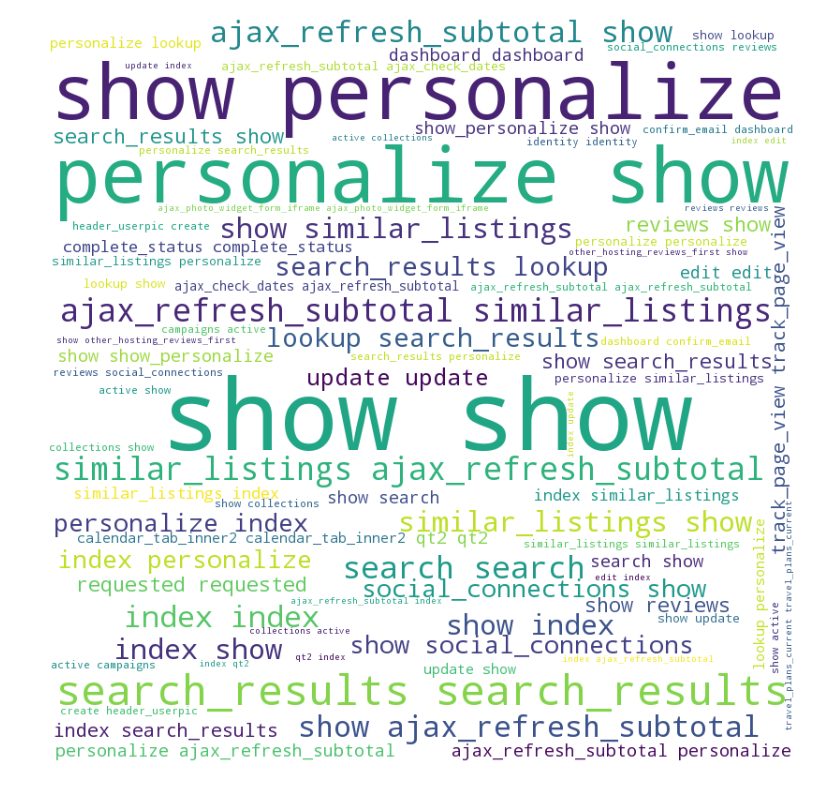

In [ ]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
  
for val in tqdm(temp_df_US['action']): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

1) To see the most frequent action with US.

100%|██████████| 20095/20095 [00:00<00:00, 36534.43it/s]


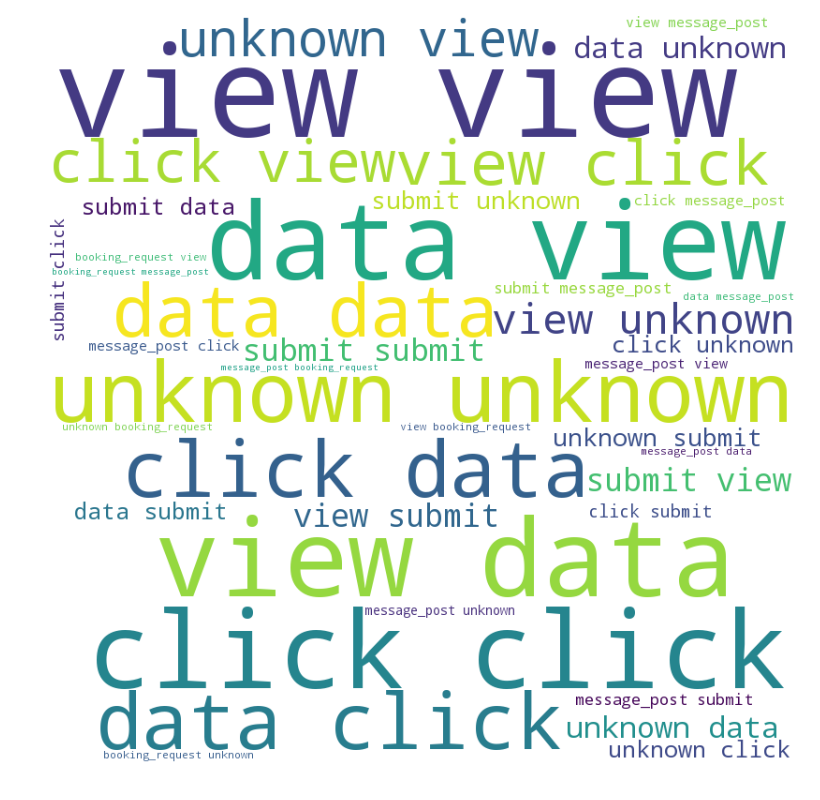

In [ ]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
  
for val in tqdm(temp_df_US['action_type']): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

1) To see the most frequent action_type with US.

100%|██████████| 20095/20095 [00:00<00:00, 32949.78it/s]


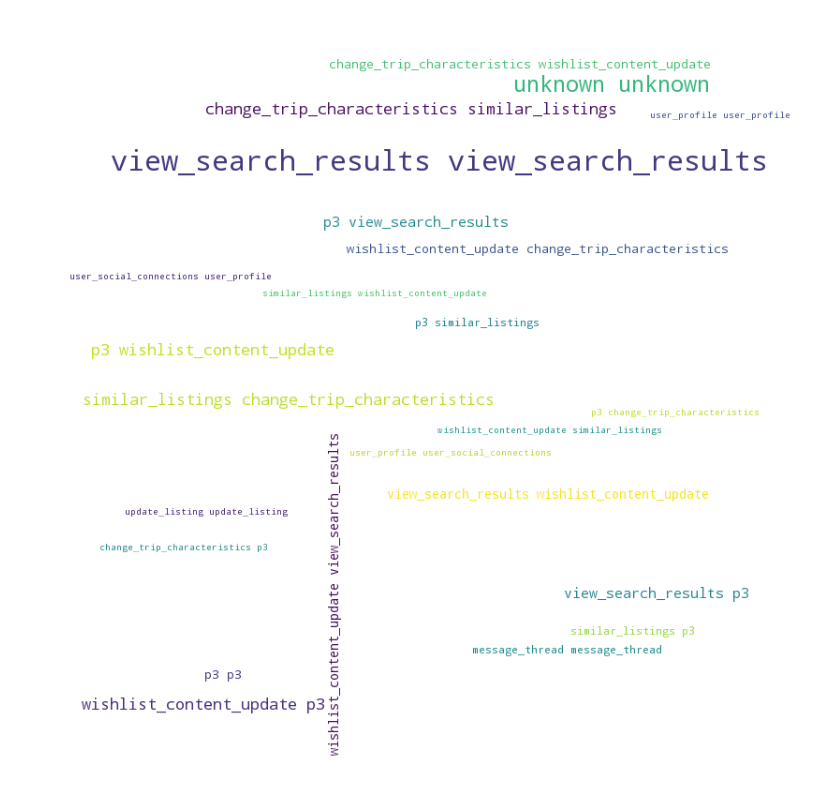

In [ ]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
  
for val in tqdm(temp_df_US['action_detail']): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

1) To see the most frequent action_detail with US.

100%|██████████| 20095/20095 [00:00<00:00, 361089.98it/s]


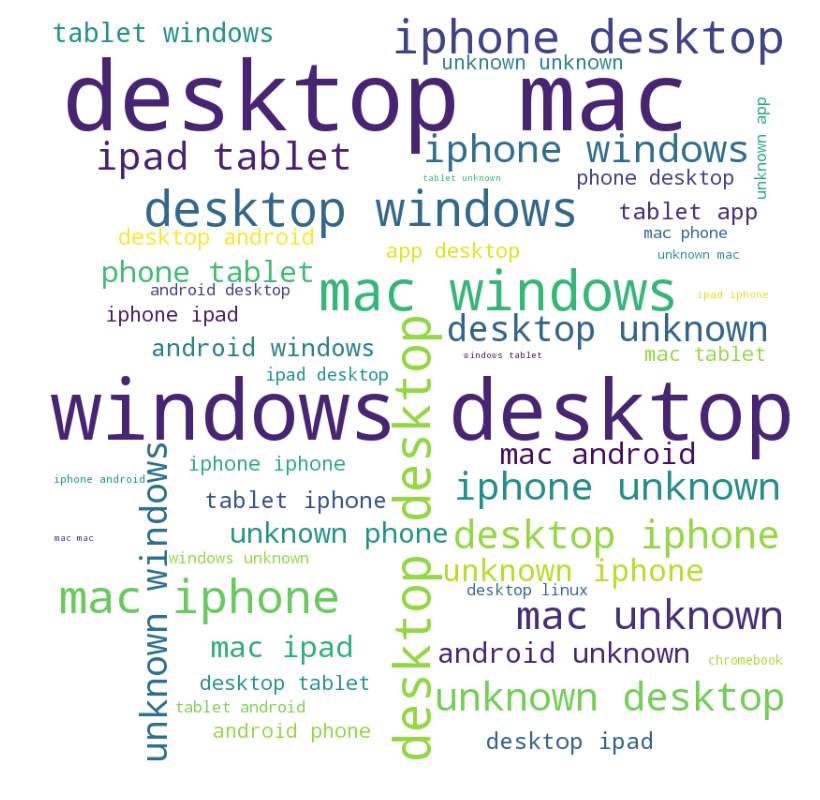

In [ ]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
  
for val in tqdm(temp_df_US['device_type']): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

1) To see the most frequent device_type with US.

In [ ]:
temp_df_others = temp_df[(temp_df['country_destination'] != 'US') & (temp_df['country_destination'] != 'NDF')]


temp_df_others.head()

action  \
0   lookup search_results lookup search_results lo...   
4   campaigns active create notifications listings...   
8   similar_listings lookup personalize index pers...   
11  search_results search_results lookup search_re...   
14  ajax_refresh_subtotal show social_connections ...   

                                          action_type  \
0    click  click  click  data view  click  data v...   
4   -unknown- -unknown- -unknown- -unknown- -unkno...   
8   data  data view data  view data  click data cl...   
11  click click  click click  click  click  click ...   
14  click view -unknown- -unknown- -unknown- -unkn...   

                                        action_detail  \
0    view_search_results  view_search_results  vie...   
4   -unknown- -unknown- -unknown- -unknown- -unkno...   
8   similar_listings  wishlist_content_update view...   
11  view_search_results view_search_results  view_...   
14  change_trip_characteristics p3 -unknown- -unkn...   

                                     device_type  secs_elapsed  \
0                      Windows Desktop -unknown-     3427529.0   
4                                         iPhone        2555.0   
8                                    Desktop Mac     1284401.0   
11                                   iPad Tablet     6808722.0   
14  Mac Android Unknown App Desktop Phone/Tablet    14742017.0   

   country_destination  
0                other  
4                   GB  
8                other  
11               other  
14                  FR

100%|██████████| 8679/8679 [00:00<00:00, 28233.00it/s]


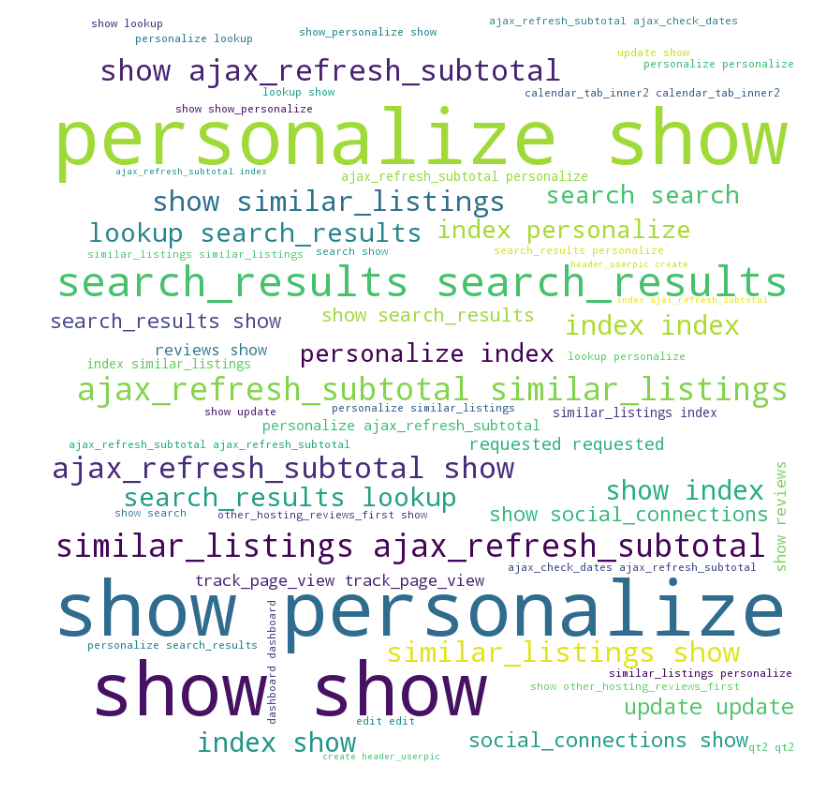

In [ ]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
  
for val in tqdm(temp_df_others['action']): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

1) To see the most frequent action with others

100%|██████████| 8679/8679 [00:00<00:00, 33566.44it/s]


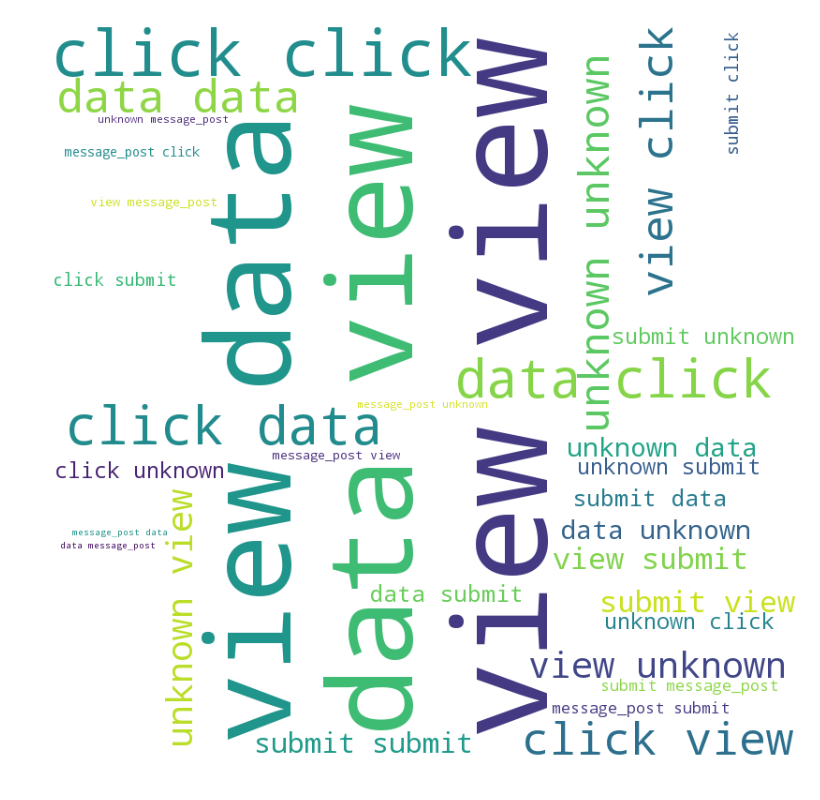

In [ ]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
  
for val in tqdm(temp_df_others['action_type']): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

1) To see the most frequent action_type with others

100%|██████████| 8679/8679 [00:00<00:00, 31176.47it/s]


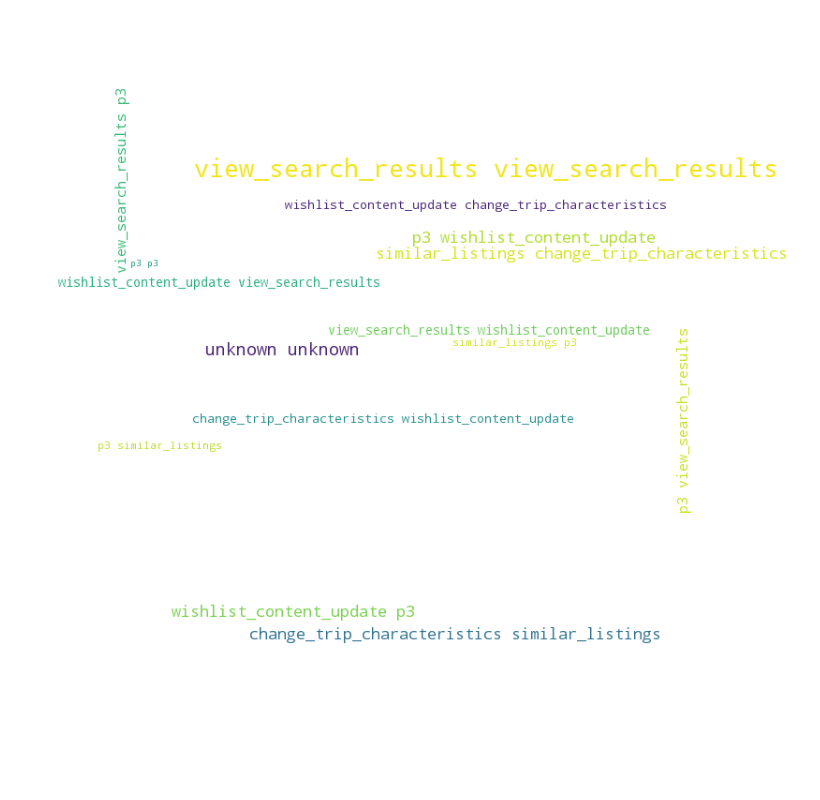

In [ ]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
  
for val in tqdm(temp_df_others['action_detail']): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

1) To see the most frequent action_detail with others

100%|██████████| 8679/8679 [00:00<00:00, 353898.61it/s]


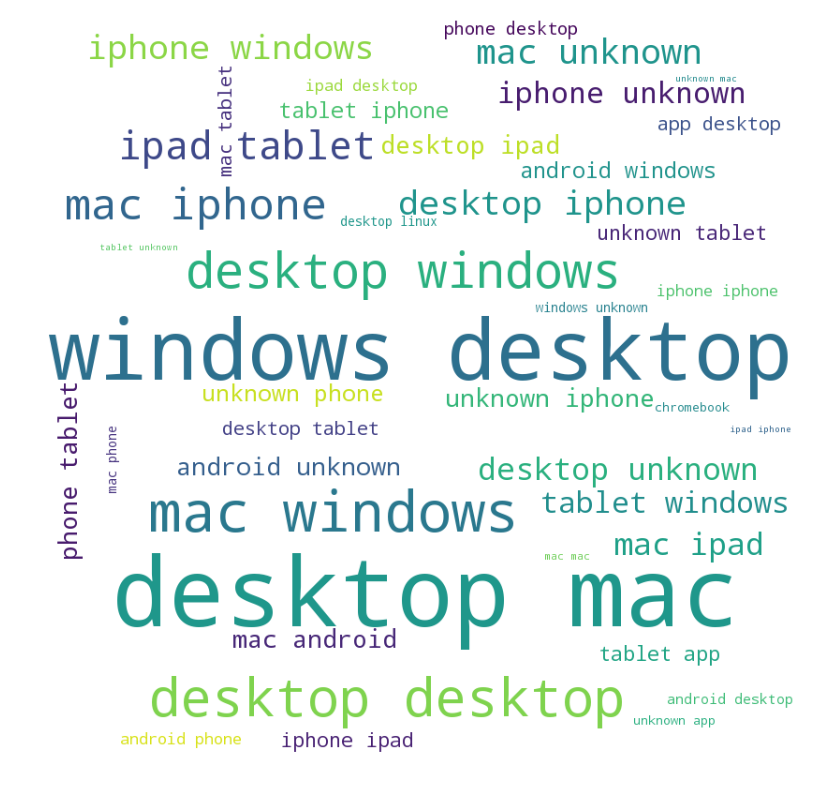

In [ ]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
  
for val in tqdm(temp_df_others['device_type']): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

1) To see the most frequent device_type with others